# Проектная работа по теме "Анализ бизнес-показателей"

В роли аналитика по маркетингу в компании-разработчике развлекательного приложения Procrastinate Pro+ разберемся в причинах убытков и поможем компании выйти в плюс.  
В нашем распоряжении три датасета. Файл `visits_info_short.csv` хранит лог сервера с информацией о посещениях сайта, `orders_info_short.csv` — информацию о заказах, а `costs_info_short.csv` — информацию о расходах на рекламу.

<a id='start'></a>
**План работы**

**[1) Загрузка и предобработка данных](#preprocessing)**  
- создать датафреймы на основе исходных файлов с данными;  
- изучить общую информацию о полученных датафреймах, вывести на экран фрагмент;  
- заменить, при необходимости, названия столбцов;  
- преобразовать, при необходимости, данные к нужному типу;  
- обработать пропуски в ячейках, при наличии;  
- проверка на наличие и обработка явных и неявных дубликатов;  
- обработать столбцы с датой и временем.  

**[2) Функции для расчёта и анализа LTV, ROI, удержания и конверсии](#functions)**  
- функции для вычисления метрик;  
- функции для построения графиков.  

**[3) Исследовательский анализ данных](#researching)**  
- составить профили пользователей; определить минимальную и максимальную даты привлечения пользователей; сформулировать выводы;  
- выяснить, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей; построить таблицу, отражающую количество пользователей и долю платящих из каждой страны; сформулировать выводы;  
- узнать, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи; построить таблицу, отражающую количество пользователей и долю платящих для каждого устройства; сформулировать выводы;  
- изучить рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей; построить таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения; сформулировать выводы.

**[4) Маркетинг](#marketing)**  
- посчитать общую сумму расходов на маркетинг;  
- выяснить, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник; сформулировать выводы;  
- построить график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику; затем на другом графике визуализировать динамику изменения расходов во времени по месяцам по каждому источнику; сформулировать выводы;  
- узнать, используя профили пользователей, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника; сформулировать выводы.

**[5) Оценка окупаемости рекламы](#analysis)**  
- используя графики LTV, ROI и CAC, проанализировать окупаемость рекламы, считая, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения; необходимость включения в анализ органических пользователей определить самостоятельно;  
- проанализировать окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI;  
- проверить конверсию пользователей и динамику её изменения; то же самое сделать с удержанием пользователей; построить и изучить графики конверсии и удержания;  
- проанализировать окупаемость рекламы с разбивкой по устройствам; построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI;  
- проанализировать окупаемость рекламы с разбивкой по странам; построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI;  
- проанализировать окупаемость рекламы с разбивкой по рекламным каналам; построить графики LTV и ROI, а также графики динамики LTV, CAC и ROI;  
- ответить на вопросы:  
    - Окупается ли реклама, направленная на привлечение пользователей в целом?  
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?  
    - Чем могут быть вызваны проблемы окупаемости?  
- написать вывод о возможных причинах обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

**[6) Общий вывод](#summary)**

---

<a id='preprocessing'></a>
### Загрузка и предобработка данных
[к оглавлению](#start)

#### Подключение библиотек

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
from datetime import datetime, timedelta

#### Загрузка датасетов, изучение общей информации

In [13]:
visits = pd.read_csv('datasets/visits_info_short.csv')
display(visits.head(10))
visits.info()

User Id         Region   Device         Channel        Session Start  \
0  981449118918  United States   iPhone         organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone         organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac         organic  2019-05-01 14:09:25   
3  326433527971  United States  Android          TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac         organic  2019-05-01 03:33:35   
5   90242400005  United States   iPhone  RocketSuperAds  2019-05-01 07:14:52   
6   43958116050  United States  Android         organic  2019-05-01 09:03:21   
7  185365244969  United States   iPhone         organic  2019-05-01 09:37:03   
8  446013509831  United States   iPhone  RocketSuperAds  2019-05-01 10:26:00   
9  100970711362  United States      Mac          TipTop  2019-05-01 04:39:53   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  
5  2019-05-01 08:19:56  
6  2019-05-01 10:08:39  
7  2019-05-01 10:00:43  
8  2019-05-01 10:59:17  
9  2019-05-01 04:57:05

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Датафрейм `visits` - лог сервера с информацией о посещениях сайта. Содержит 309901 строку без пропущенных значений.

In [14]:
orders = pd.read_csv('datasets/orders_info_short.csv')
display(orders.head(10))
orders.info()

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99
5  129100331057  2019-05-01 01:56:28     4.99
6  626807144131  2019-05-01 02:39:21     4.99
7  914062168985  2019-05-01 02:02:18     4.99
8  769669137453  2019-05-01 03:39:47     4.99
9  434198630691  2019-05-01 18:16:50     5.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


Датафрейм `orders` содержит информацию о покупках в приложении. Пропущенных значений нет.

In [15]:
ad_costs = pd.read_csv('datasets/costs_info_short.csv')
display(ad_costs.head(10))
ad_costs.info()

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1
5  2019-05-06  FaceBoom  118.8
6  2019-05-07  FaceBoom  101.2
7  2019-05-08  FaceBoom  100.1
8  2019-05-09  FaceBoom   93.5
9  2019-05-10  FaceBoom  104.5

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Датафрейм `ad_costs` содержит информацию о расходах на рекламу. Пропусков в ячейках нет.

#### Приведем названия столбцов датафреймов к "змеиному" стилю

In [16]:
visits.columns = ['user_id','region','device','channel','session_start','session_end']
orders.columns = ['user_id','event_dt','revenue']
ad_costs.columns = ['dt','channel','costs']

#### Преобразование данных к нужному типу

In [17]:
#преобразование в формат datetime
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date

#### Обработка пропусков

Судя по информации, полученной выше методом `*.info()`, пропусков в датафреймах нет.

#### Выявление и обработка дубликатов

##### Обработка явных дубликатов

In [18]:
print(visits.duplicated().sum())
print(orders.duplicated().sum())
print(ad_costs.duplicated().sum())

0
0
0


Явных дубликатов в таблицах нет. Проверим неявные.

##### Обработка неявных дубликатов

In [19]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [20]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [21]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [22]:
ad_costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

Неявных дубликатов также не выявлено.

#### Итоги раздела:  
Предобработка завершена. 
К нам попали очень чистые данные: в таблицах отсутствуют пропущенные значения, явные и неявные дубликаты отсутствуют.
Мы скорректировали названия столбцов в датафреймах и преобразовали тип столбцов с датой - из `object` в `datetime` - для удобства дальнейшей с ними работы.

<a id='functions'></a>
### Функции для расчёта и анализа LTV, ROI, удержания и конверсии  
[к оглавлению](#start)  
  
В этом разделе добавим в код и опишем вспомогательные функции, разработанные в теоретической части темы "Анализ бизнес-показателей".

#### Функции для вычисления метрик

In [23]:
# функция для создания пользовательских профилей
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):
    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())
    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)
    return profiles    

In [24]:
# функция для расчёта удержания
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [25]:
# функция для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']
    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result
    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)
    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []
    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [26]:
# функция для расчёта LTV и ROI
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):
    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes
        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)
        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes
        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']
        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        # возвращаем таблицы LTV и ROI
        return result, roi
    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []
    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Функции для визуализации метрик

In [27]:
# функция для сглаживания фрейма
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [28]:
# функция для визуализации удержания
def plot_retention(retention, retention_history, horizon, window=7):
    # задаём размер сетки для графиков
    plt.figure(figsize=(14,10), dpi=70)
    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]
    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])
    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание пользователей')
    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
#    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
#    retention.query('payer == False').droplevel('payer').T.plot(
#        grid=True, ax=ax2
#    )
    plt.legend()
    plt.xlabel('Лайфтайм')
#    plt.title('Удержание неплатящих пользователей')
    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания пользователей на {}-й день'.format(
            horizon
        )
    )
    # в чётвертой ячейке — динамика удержания неплатящих
 #   ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
#    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
#    plt.title(
#        'Динамика удержания неплатящих пользователей на {}-й день'.format(
#            horizon
#        )
#    )   
    plt.tight_layout()
    plt.show() 

In [29]:
# функция для визуализации конверсии
def plot_conversion(conversion, conversion_history, horizon, window=7):
    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))
    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]
    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')
    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))
    plt.tight_layout()
    plt.show() 

In [30]:
# функция для визуализации LTV и ROI
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):
    # задаём сетку отрисовки графиков
    plt.figure(figsize=(15, 10),dpi=180)
    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]
    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]
    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]
    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')
    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))
    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')
    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')
    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

<a id='researching'></a>
### Исследовательский анализ данных
[к оглавлению](#start)

#### Составление профилей пользователей; определение минимальной и максимальной дат привлечения пользователей.  

In [31]:
#датафрейм с профилями пользователей
profiles = get_profiles(visits, orders, None, ad_costs)
display(profiles.head(5))
profiles.info()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150008 entries, 0 to 150007
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           150008 non-null  int64         
 1   first_ts          150008 non-null  datetime64[ns]
 2   channel           150008 non-null  object        
 3   device            150008 non-null  object        
 4   region            150008 non-null  object        
 5   dt                150008 non-null  object        
 6   month             150008 non-null  datetime64[ns]
 7   payer             150008 non-null  bool          
 8   acquisition_cost  150008 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 10.4+ MB


In [32]:
min_first_ts = profiles['first_ts'].min().date()
print('Минимальная дата привлечения пользователей: ', min_first_ts)

Минимальная дата привлечения пользователей:  2019-05-01


In [33]:
max_first_ts = profiles['first_ts'].max().date()
print('Максимальная дата привлечения пользователей: ', max_first_ts)

Максимальная дата привлечения пользователей:  2019-10-27


**Выводы:**  
Уникальных пользователей чуть больше 150 тыс., почти в два раза меньше, чем строк в таблице `visits`. То есть среднее количество заходов в приложение - чуть больше двух.  
Период наблюдения - полгода, с 1-го мая 2019 по 27 октября 2019, что совпадает с заданием на проект.

#### Распределение пользователей по странам; определение, на какую страну приходится больше всего платящих пользователей; построение таблицы, отражающей количество пользователей и долю платящих из каждой страны

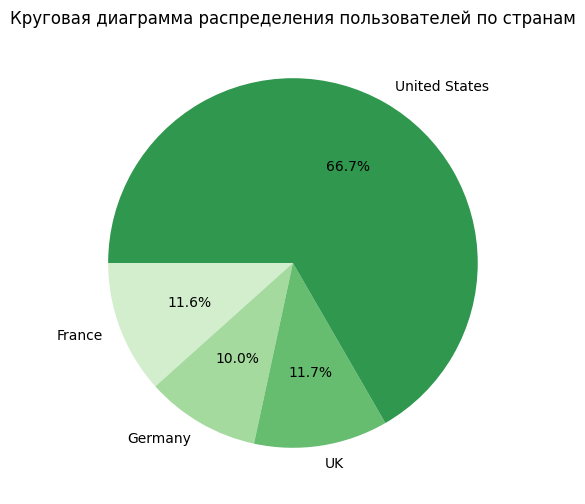

In [34]:
region_profiles = profiles.groupby('region').agg({'user_id':'count'})
plt.figure(figsize=(6,6), dpi=100)
colors = plt.get_cmap('Greens')(np.linspace(0.2, 0.7, len(region_profiles['user_id'])))
plt.title('Круговая диаграмма распределения пользователей по странам')
plt.pie(region_profiles['user_id']
        ,labels=region_profiles.index
        ,autopct='%.1f%%'
        ,colors=colors
        ,startangle=180
       );

In [35]:
display(profiles.groupby(['payer','region']).agg({'user_id':'count'}).sort_values(by=['payer','user_id'],ascending=False))

user_id
payer region                
True  United States     6902
      UK                 700
      France             663
      Germany            616
False United States    93100
      UK               16875
      France           16787
      Germany          14365

Больше всего платящих пользователей заходят в приложение из США - 6902 человека. В десять раз больше, чем из любого другого региона.  Посчитаем долю платящих пользователей по каждой стране.

In [36]:
all_and_payers = profiles.groupby('region').agg({'user_id':'count','payer':'sum'})
all_and_payers['payer_percent'] = round((100*all_and_payers['payer']/all_and_payers['user_id']),3)
display(all_and_payers.sort_values(by='payer_percent',ascending=False))

user_id  payer  payer_percent
region                                      
United States   100002   6902          6.902
Germany          14981    616          4.112
UK               17575    700          3.983
France           17450    663          3.799

Процент платящих пользователей из США также существенно выше, чем пользователей из других стран. 

#### Распределение пользователей по используемым устройствам; определение, какие устройства предпочитают платящие пользователи; построение таблицы, отражающей количество пользователей и долю платящих для каждого устройства

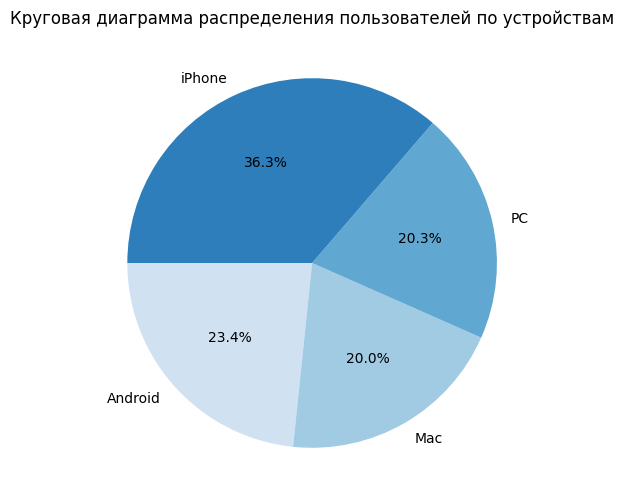

In [37]:
device_profiles = profiles.groupby('device').agg({'user_id':'count'})
plt.figure(figsize=(6,6), dpi=100)
colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(device_profiles['user_id'])))
plt.title('Круговая диаграмма распределения пользователей по устройствам')
plt.pie(device_profiles['user_id']
        ,labels=device_profiles.index
        ,autopct='%.1f%%'
        ,colors=colors
        ,startangle=180
       );

In [38]:
display(profiles.groupby(['payer','device']).agg({'user_id':'count'}).sort_values(by=['payer','user_id'],ascending=False))

user_id
payer device          
True  iPhone      3382
      Android     2050
      Mac         1912
      PC          1537
False iPhone     51097
      Android    32982
      PC         28918
      Mac        28130

Больше всего пользователей и плятящих пользователей заходили в приложение с IPhone.  
Посмотрим процент платящих пользователей от общего числа пользователей того или иного устройства:

In [39]:
all_and_payers = profiles.groupby('device').agg({'user_id':'count','payer':'sum'})
all_and_payers['payer_percent'] = round((100*all_and_payers['payer']/all_and_payers['user_id']),3)
display(all_and_payers.sort_values(by='payer_percent',ascending=False))

user_id  payer  payer_percent
device                                
Mac        30042   1912          6.364
iPhone     54479   3382          6.208
Android    35032   2050          5.852
PC         30455   1537          5.047

По всем устройствам доли платящих вполне сравнимы - от 5 до 6.3 процента. В процентном отношении платящие пользователи Mac обходят пользователей iPhone незначительно, на 0.15 процента.  

#### Определение рекламных источников, из которых пришло больше всего пользователей; построение таблицы, отражающей количество пользователей и долю платящих для каждого канала привлечения

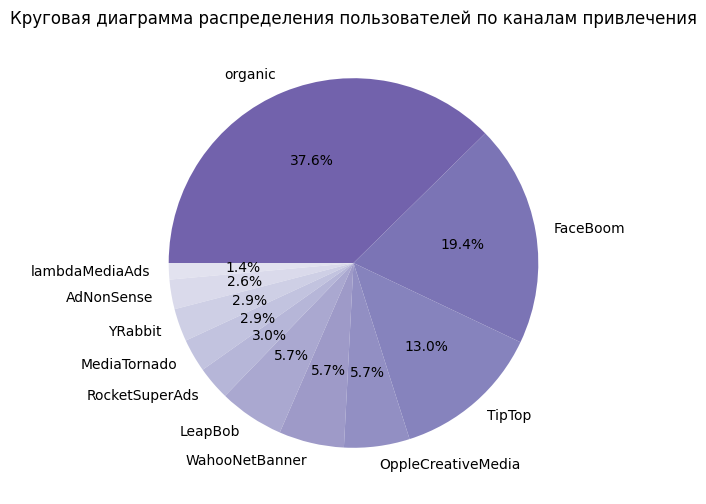

In [40]:
channel_profiles = profiles.groupby('channel').agg({'user_id':'count'}).sort_values('user_id')
plt.figure(figsize=(6,6), dpi=100)
colors = plt.get_cmap('Purples')(np.linspace(0.2, 0.7, len(channel_profiles['user_id'])))
plt.title('Круговая диаграмма распределения пользователей по каналам привлечения')
plt.pie(channel_profiles['user_id']
        ,labels=channel_profiles.index
        ,autopct='%.1f%%'
        ,colors=colors
        ,startangle=180
       );

In [41]:
display(profiles.groupby(['payer','channel']).agg({'user_id':'count'}).sort_values(by=['payer','user_id'],ascending=False))

user_id
payer channel                    
True  FaceBoom               3557
      TipTop                 1878
      organic                1160
      WahooNetBanner          453
      AdNonSense              440
      RocketSuperAds          352
      LeapBob                 262
      OppleCreativeMedia      233
      lambdaMediaAds          225
      YRabbit                 165
      MediaTornado            156
False organic               55279
      FaceBoom              25587
      TipTop                17683
      OppleCreativeMedia     8372
      LeapBob                8291
      WahooNetBanner         8100
      MediaTornado           4208
      YRabbit                4147
      RocketSuperAds         4096
      AdNonSense             3440
      lambdaMediaAds         1924

В топе по платящим пользователям - FaceBoom.  
Проверим долю платящих пользователей для всех каналов привлечения.

In [42]:
all_and_payers = profiles.groupby('channel').agg({'user_id':'count','payer':'sum'})
all_and_payers['payer_percent'] = round((100*all_and_payers['payer']/all_and_payers['user_id']),3)
all_and_payers = all_and_payers.sort_values(by='payer_percent',ascending=False)
display(all_and_payers)

user_id  payer  payer_percent
channel                                          
FaceBoom              29144   3557         12.205
AdNonSense             3880    440         11.340
lambdaMediaAds         2149    225         10.470
TipTop                19561   1878          9.601
RocketSuperAds         4448    352          7.914
WahooNetBanner         8553    453          5.296
YRabbit                4312    165          3.827
MediaTornado           4364    156          3.575
LeapBob                8553    262          3.063
OppleCreativeMedia     8605    233          2.708
organic               56439   1160          2.055

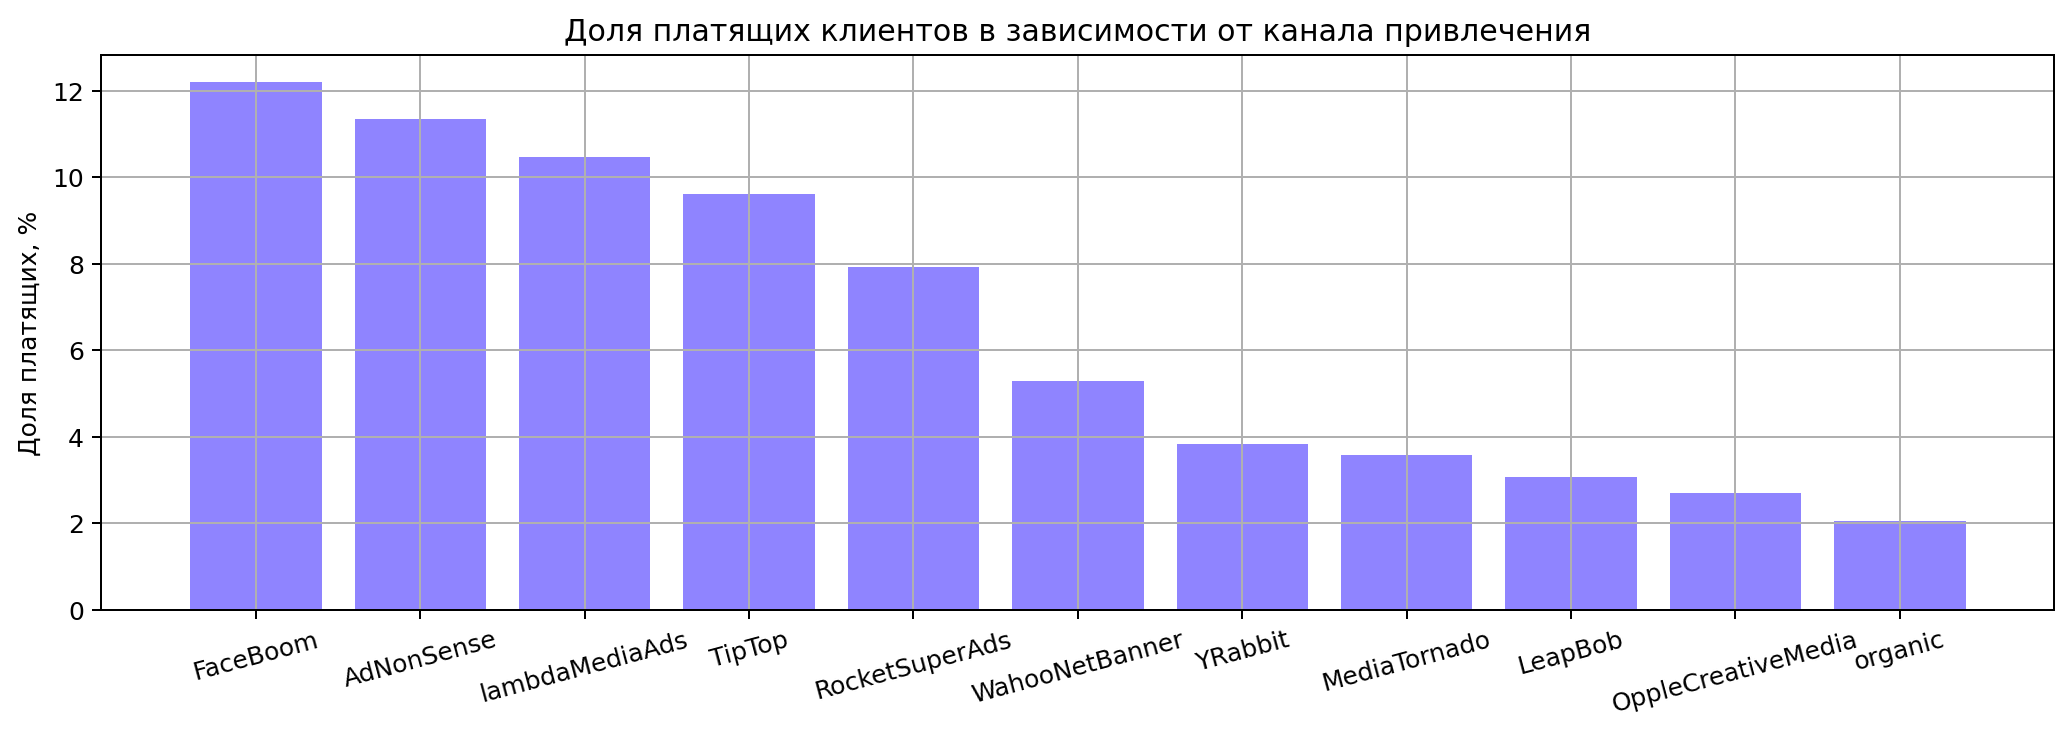

In [43]:
#визуализируем, для наглядности
plt.figure(figsize=(14,4), dpi=180)
plt.title('Доля платящих клиентов в зависимости от канала привлечения')
plt.grid()
plt.xticks(rotation=15)
plt.bar(height=all_and_payers['payer_percent'], x=all_and_payers.index,color='#4433ff',alpha=0.6)
plt.ylabel('Доля платящих, %');

И в абсолютном, и в относительном выражении максимальное количество платящих пользователей приходит в приложение через канал FaceBoom.  
Только два процента пользователей, заходящих в приложение не из рекламы, совершают в приложении покупки. Это минимальное отношение среди всех каналов, зато они достаются компании бесплатно. 

#### Выводы по разделу:  
По полученным результатам проведенных исследований составим портрет типичного пользователя приложения, из тех, которые хотя бы один раз совершали в приложении покупку. Этот пользователь - из США, пришел в приложение через рекламу в FaceBoom со своего iPhone.

<a id='marketing'></a>
### Маркетинг
[к оглавлению](#start)

#### Подсчет общей суммы расходов на маркетинг

In [44]:
ad_total_cost = round(ad_costs['costs'].sum(),3)
print('Общая сумма расходов на рекламу: $', ad_total_cost)

Общая сумма расходов на рекламу: $ 105497.3


#### Распределение трат по рекламным источникам

In [45]:
ad_channel_costs = ad_costs.groupby('channel').agg({'costs':'sum'}).sort_values(by='costs',ascending=False)
ad_channel_costs['percent'] = (100*ad_channel_costs['costs']/ad_total_cost).round(2)
display(ad_channel_costs)

costs  percent
channel                              
TipTop              54751.30    51.90
FaceBoom            32445.60    30.75
WahooNetBanner       5151.00     4.88
AdNonSense           3911.25     3.71
OppleCreativeMedia   2151.25     2.04
RocketSuperAds       1833.00     1.74
LeapBob              1797.60     1.70
lambdaMediaAds       1557.60     1.48
MediaTornado          954.48     0.90
YRabbit               944.22     0.90

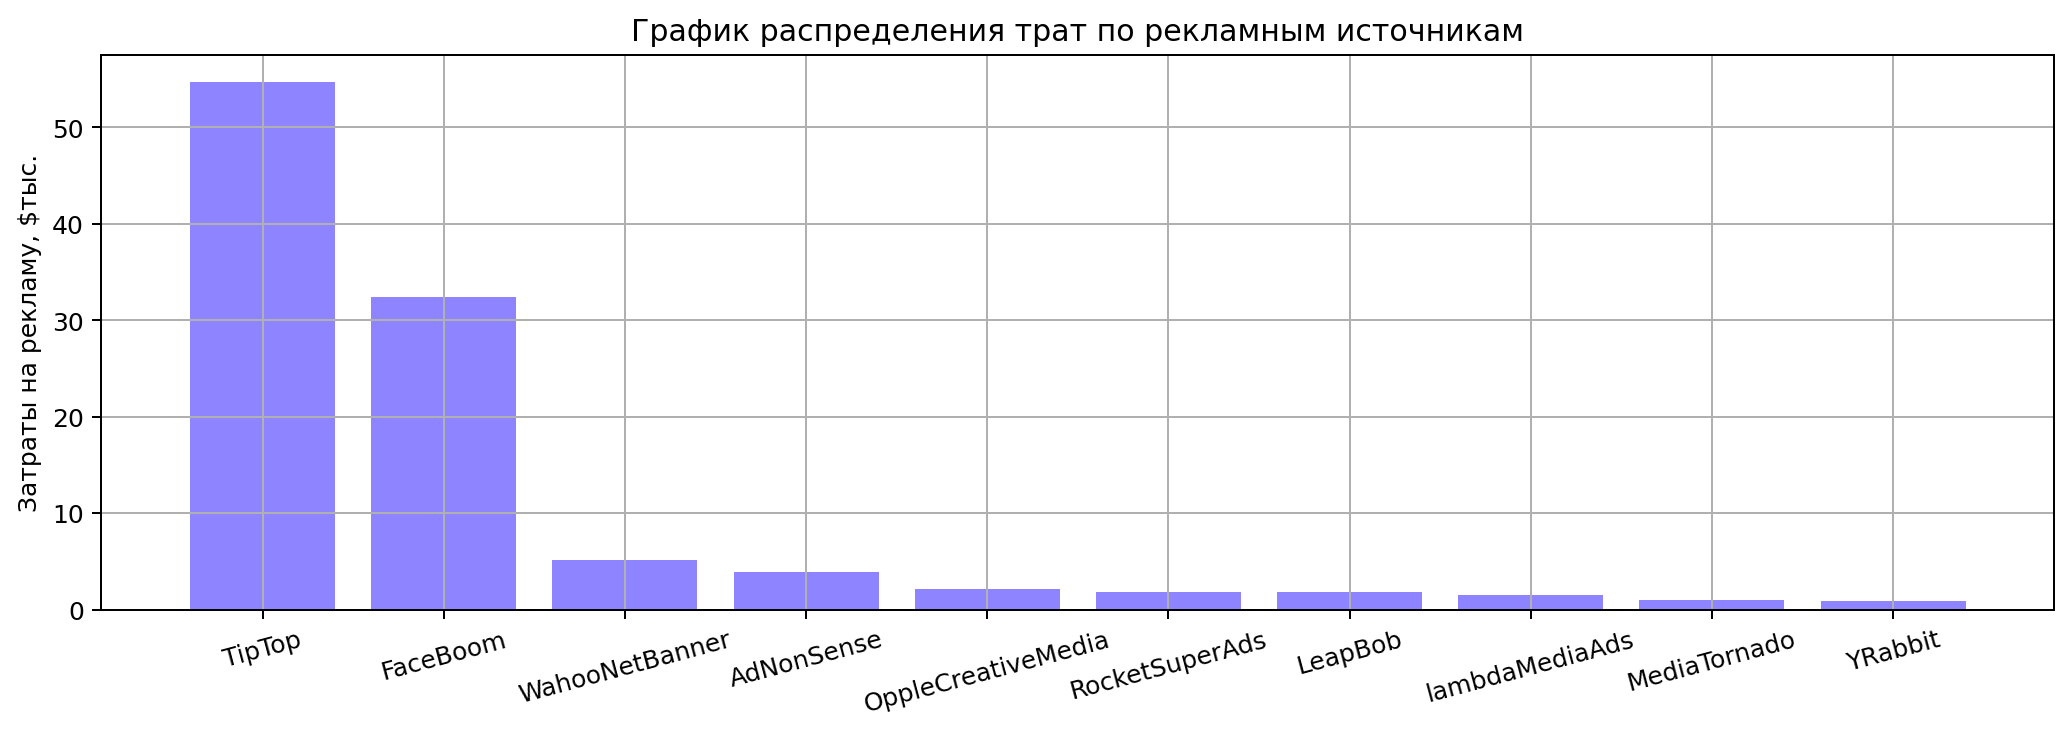

In [46]:
plt.figure(figsize=(14,4), dpi=180)
plt.title('График распределения трат по рекламным источникам')
plt.grid()
plt.xticks(rotation=15)
plt.bar(height=ad_channel_costs['costs']/1000, x=ad_channel_costs.index,color='#4433ff',alpha=0.6)
plt.ylabel('Затраты на рекламу, $тыс.');

Затраты на рекламу в TipTop равны затратам на все остальные каналы, даже немного больше. Т.е. более половины всех затрат на рекламу. При этом привлеченных пользователей оттуда в полтора раза меньше, чем из FaceBoom, где реклама обошлась на 40% дешевле. Общее число и процент платящих пользователей также меньше, чем у FaceBoom.

#### Построение графика с визуализацией динамики изменения расходов во времени по неделям по каждому источнику; построение графика динамики изменения расходов по времени по месяцам по каждому источнику

In [47]:
#добавим в датафрейм ad_costs столбцы с номером месяца и недели
ad_costs['dt'] = pd.to_datetime(ad_costs['dt'])
ad_costs['month'] = ad_costs['dt'].dt.month
ad_costs['week'] = ad_costs['dt'].dt.isocalendar().week
ad_costs.head(5)

dt   channel  costs  month  week
0 2019-05-01  FaceBoom  113.3      5    18
1 2019-05-02  FaceBoom   78.1      5    18
2 2019-05-03  FaceBoom   85.8      5    18
3 2019-05-04  FaceBoom  136.4      5    18
4 2019-05-05  FaceBoom  122.1      5    18

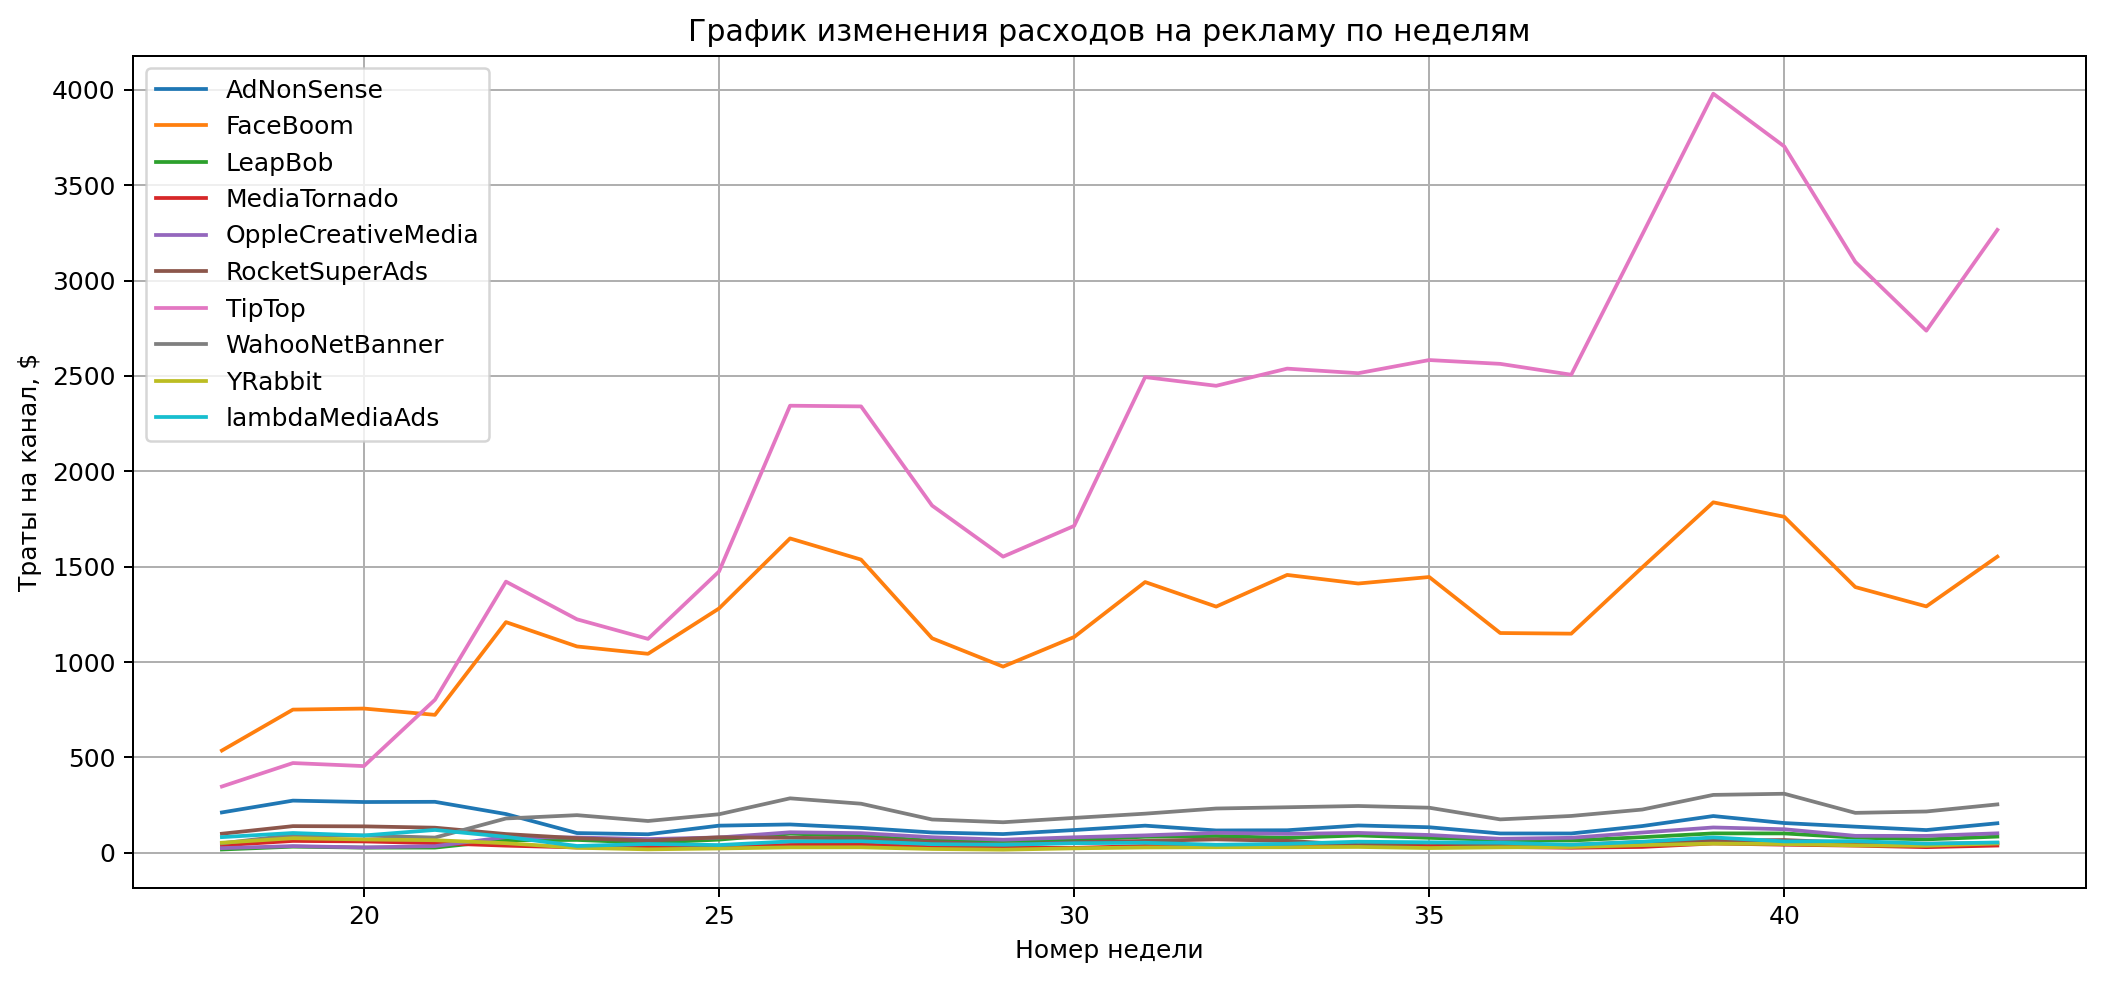

In [48]:
#построим график изменения расходов на рекламу для каждого канала 
#по неделям
ad_costs_chan = ad_costs.groupby(['channel','week']).agg({'costs':'sum'}).reset_index()
plt.figure(figsize=(14,6), dpi=180)
plt.title('График изменения расходов на рекламу по неделям')
plt.grid()
for ch in ad_costs_chan['channel'].unique():
    x=ad_costs_chan.query('channel == @ch')[['week','costs']]
    plt.plot(x['week'],x['costs'],label=ch)
plt.legend(loc='upper left')
plt.xlabel('Номер недели')
plt.ylabel('Траты на канал, $');
plt.show()

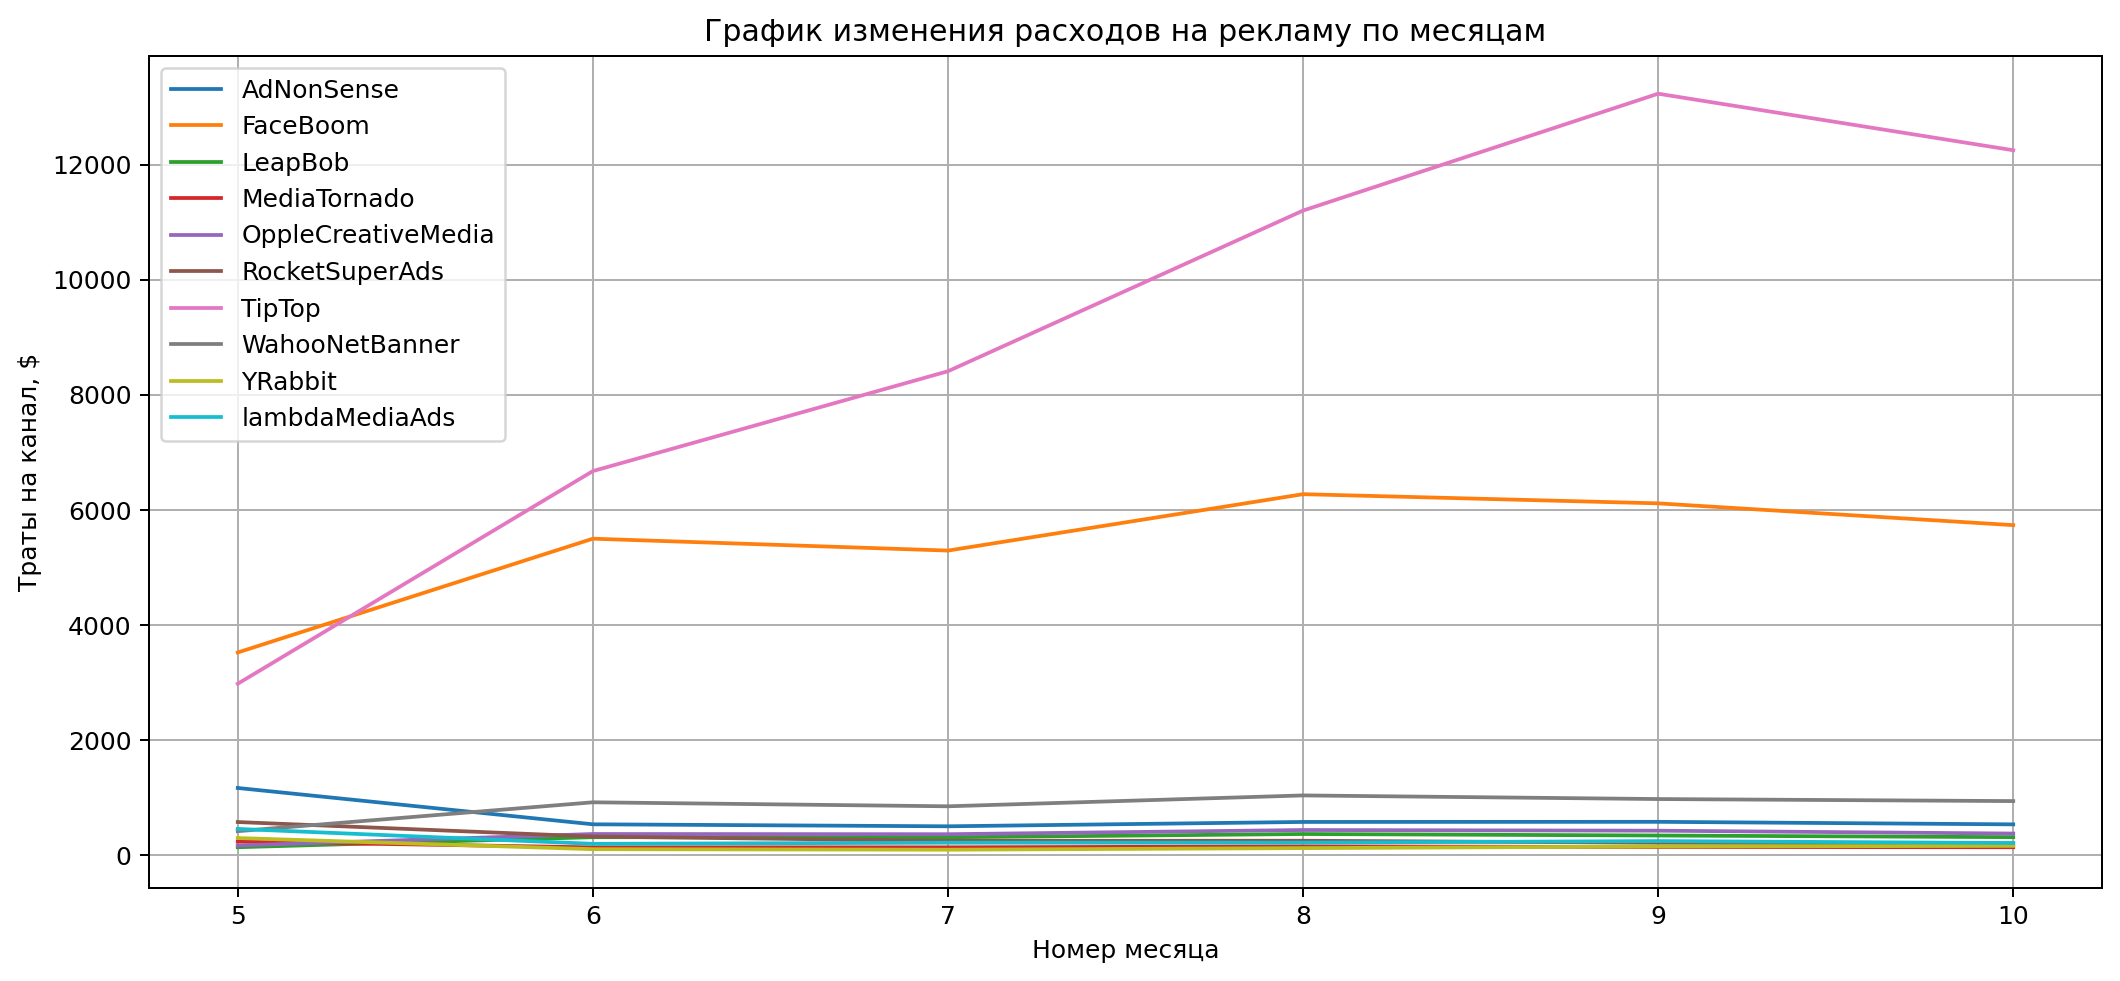

In [49]:
#построим график изменения расходов на рекламу для каждого канала 
#по месяцам
ad_costs_chan = ad_costs.groupby(['channel','month']).agg({'costs':'sum'}).reset_index()
plt.figure(figsize=(14,6), dpi=180)
plt.title('График изменения расходов на рекламу по месяцам')
plt.grid()
for ch in ad_costs_chan['channel'].unique():
    x=ad_costs_chan.query('channel == @ch')[['month','costs']]
    plt.plot(x['month'],x['costs'],label=ch)
plt.legend(loc='upper left')
plt.xlabel('Номер месяца')
plt.ylabel('Траты на канал, $');
plt.show()

Основные затраты на рекламу разделили два канала - TipTop и FaceBoom. Месячные затраты на них в конце периода анализа - \\$12000 и \\$6000 соответственно. Тогда как другие каналы за все время наблюдения редко переваливают за \\$1000, находясь, в основном, в районе \\$300-\\$500.  
Что касается развития расходов по времени, то здесь отличаются те же два канала, TipTop и FaceBoom. На начало наблюдения месячные затраты на них составляли \\$3000 и \\$3500 соответственно, но потом выросли в 4 и в 1.7 раза.  

Если посмотреть на начало графика недельных затрат, то можно увидеть, что графики двух топовых по затратам каналов начинаются с тех же величин, что и другие каналы. Но потом скачками растут вверх. Видимо, после проведения анализа откликов пользователей на рекламу в тех или иных каналах, принималось решение об увеличении затрат на рекламу в TipTop и FaceBoom.

#### Расчет средней стоимости привлечения одного пользователя (САС) из каждого источника

In [50]:
cac_chan = profiles.groupby('channel').agg({'acquisition_cost':'mean'}).sort_values(by='acquisition_cost',ascending=False)
display(cac_chan)

acquisition_cost
channel                             
TipTop                      2.799003
FaceBoom                    1.113286
AdNonSense                  1.008054
lambdaMediaAds              0.724802
WahooNetBanner              0.602245
RocketSuperAds              0.412095
OppleCreativeMedia          0.250000
YRabbit                     0.218975
MediaTornado                0.218717
LeapBob                     0.210172
organic                     0.000000

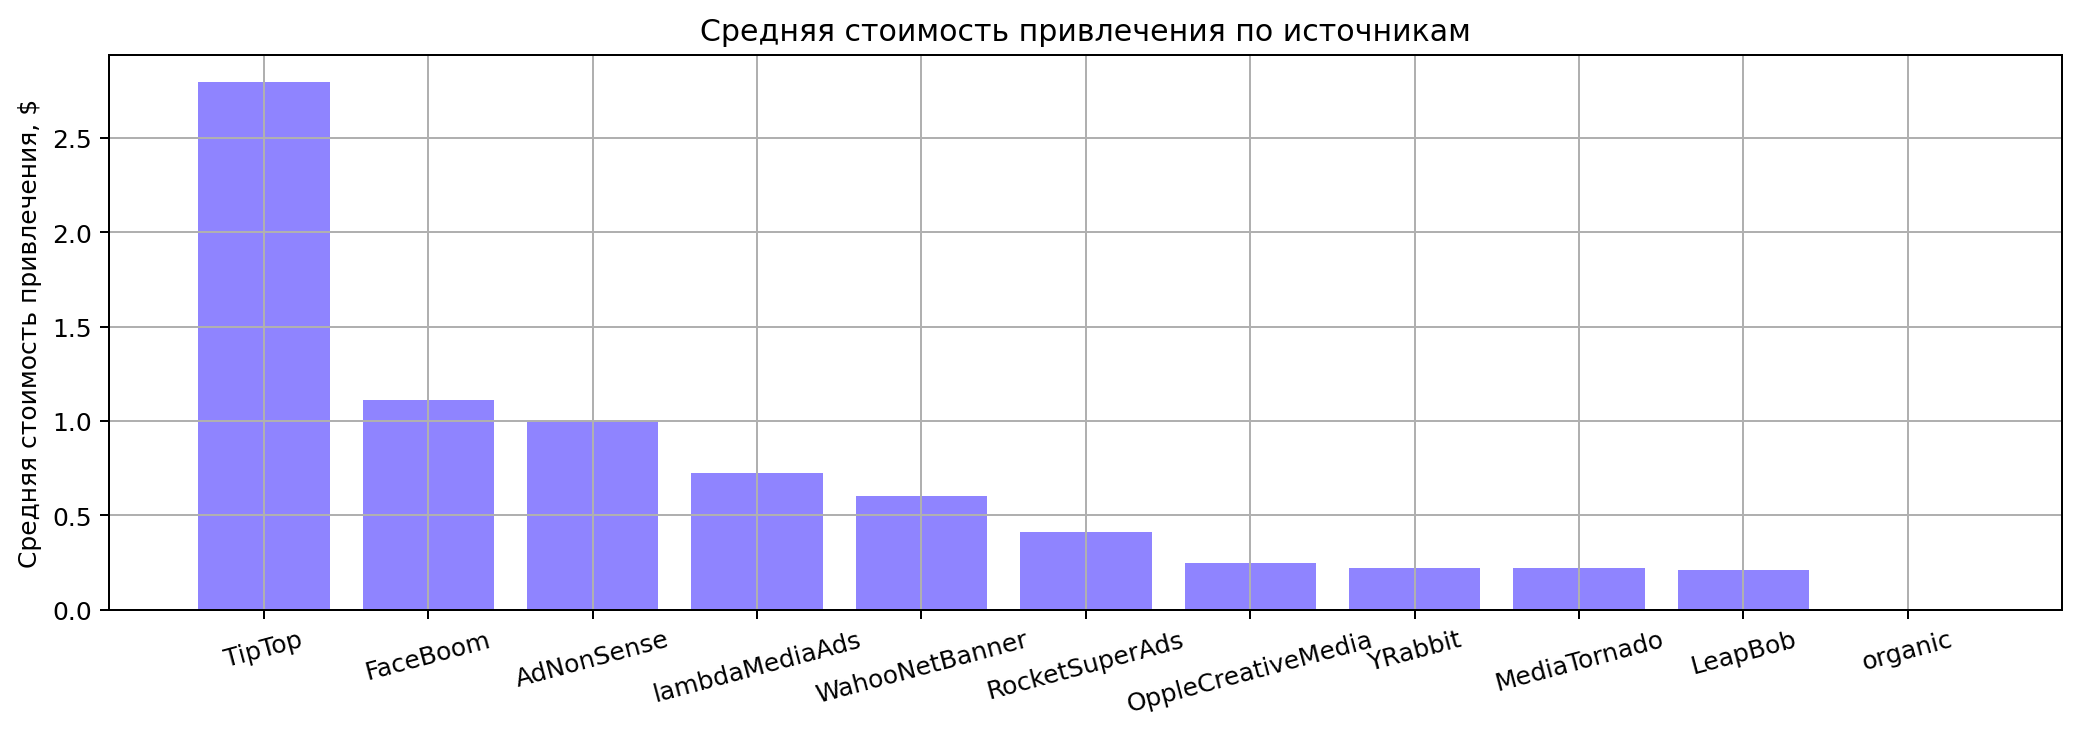

In [51]:
# визуализируем:
plt.figure(figsize=(14,4), dpi=180)
plt.title('Средняя стоимость привлечения по источникам')
plt.grid()
plt.xticks(rotation=15)
plt.bar(height=cac_chan['acquisition_cost'], x=cac_chan.index, color='#4433ff', alpha=0.6)
plt.ylabel('Средняя стоимость привлечения, $');

In [52]:
# рассчитаем, для сравнения, среднюю САС на одного пользователя, не считая органическиъх пользователей:
total_avg_cac = profiles.query('channel != "organic"')['acquisition_cost'].mean().round(2)
print('Общая средняя САС для одного пользователя:',total_avg_cac)

Общая средняя САС для одного пользователя: 1.13


Наблюдения:  
САС для TipTop - самый большой, равен \\$2.8, и выше ближайшего соседа, FaceBoom, в 2.5 раза. Еще один канал, AdNonSense, сравним с FaceBoom, его САС равен \\$1.  
Самыми дешевыми каналами привлечения оказались YRabbit, MediaTornado и LeapBob, со средней стоимостью привлечения в 21 цент.

#### Выводы по разделу:  
За весь рассматриваемый период на рекламу в 10 разных источниках было потрачено \\$105497.3, причем 82% процента этой суммы распределились лишь между двумя каналами - TipTop (52%) и FaceBoom (30%). Благодаря этому, эти два канала привлекли 70% от всех платящих пользователей, если не учитывать органиков. И видно, что и затраты на привлечение пользователя (САС) у этих каналов больше других. Эффективность рекламы на TipTop самая низкая, так как САС равна \\$2.8, что в 2.5 раза выше средней.  
Самыми эффективными каналами привлечения оказались YRabbit, MediaTornado и LeapBob, со средней стоимостью привлечения в 21 цент.

<a id='analysis'></a>
### Оценка окупаемости рекламы
[к оглавлению](#start)

#### Анализ окупаемости рекламы  
Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы, считая, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения; необходимость включения в анализ органических пользователей определим самостоятельно.

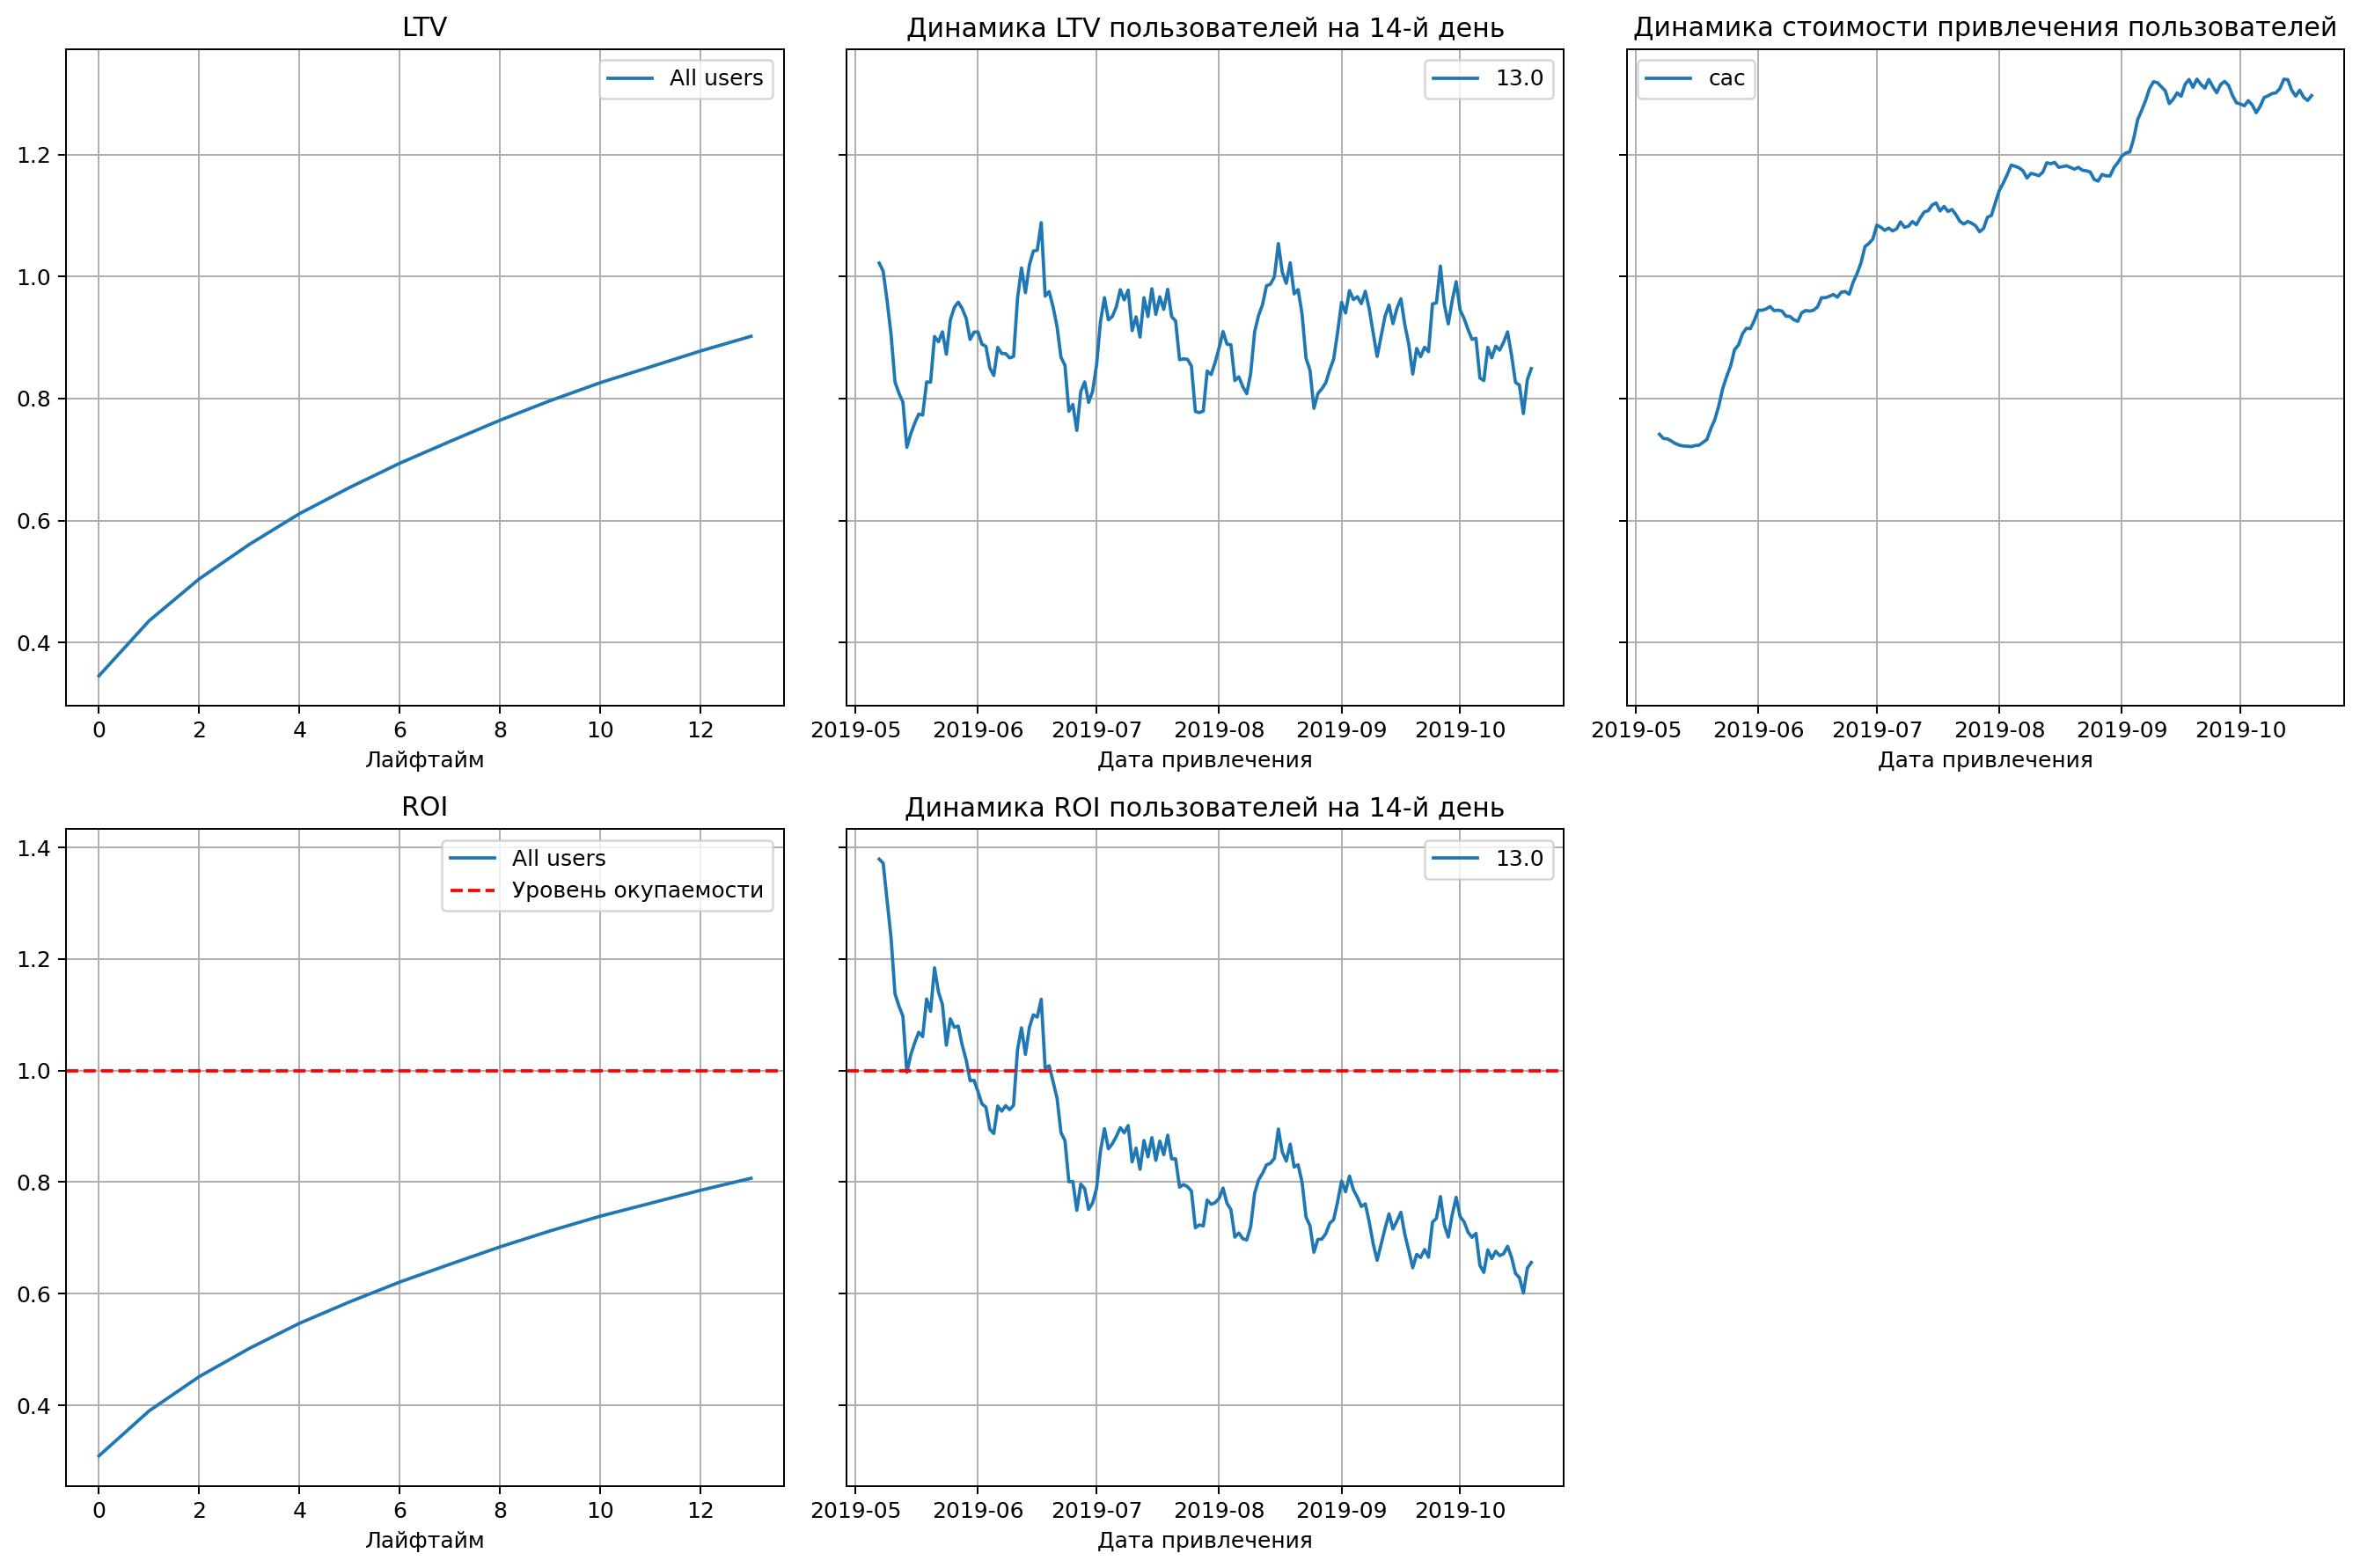

In [53]:
# исключим из profiles органических пользователей:
profiles_orgout = profiles.query('channel != "organic"')

# построим графики
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_orgout, orders, observation_date, horizon_days)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Выводы:  
LTV и ROI постоянно растут, значит, с расчетами все верно. LTV в динамике за двухнедельный срок колеблется в диапазоне 0.8 - 1.0. Среднее ROI в динамике уходит под линию окупаемости в связи или с возрастающими издержками на рекламу, или с оттоком пользователей.  
График среднего ROI показывает, что издержки на рекламу за две недели не окупаются. ROI на 14-й день достигает уровня 0.8.

#### Проверка конверсии пользователей и динамики ее изменения, удержания пользователей и его динамики; построение и изучение графиков конверсии и удержания.

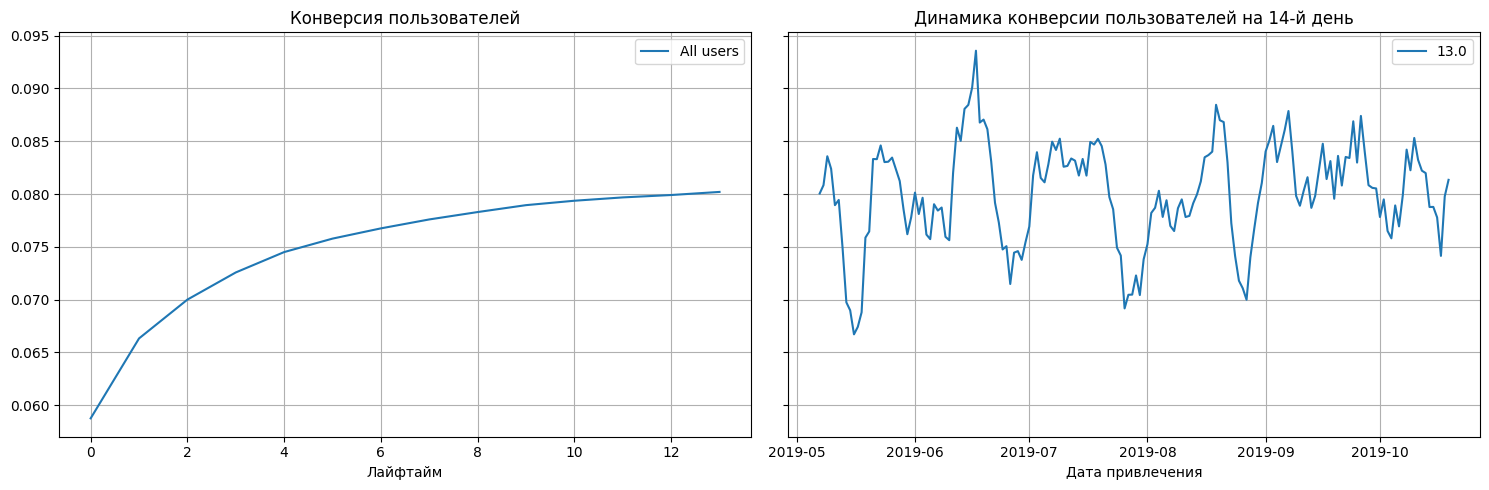

In [54]:
# общая конверсия, ее изменение и их графики:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_orgout, orders, observation_date, horizon_days, dimensions=[]
)

plot_conversion(conversion_grouped, conversion_history, horizon_days)

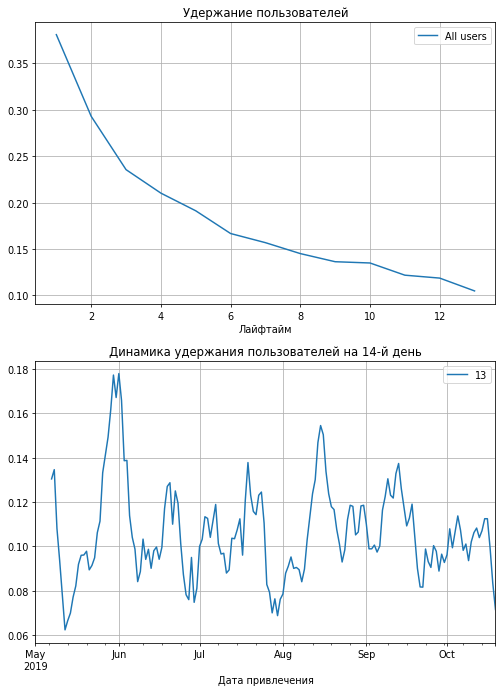

In [55]:
# общее удержание, его изменение и их графики:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_orgout, visits, observation_date, horizon_days, dimensions=[]
)

plot_retention(retention_grouped, retention_history, horizon_days)

Наблюдения:  
График общей конверсии похож на стандартный - все хорошо. Средняя конверсия на 14-й день равна 8%.  
График общего удержания обратно-экспоненциально убывает. Все в соответствии с теорией. Среднее удержание на 14-й день равно 10%.

#### Анализ окупаемости рекламы с разбивкой по устройствам; построение графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI

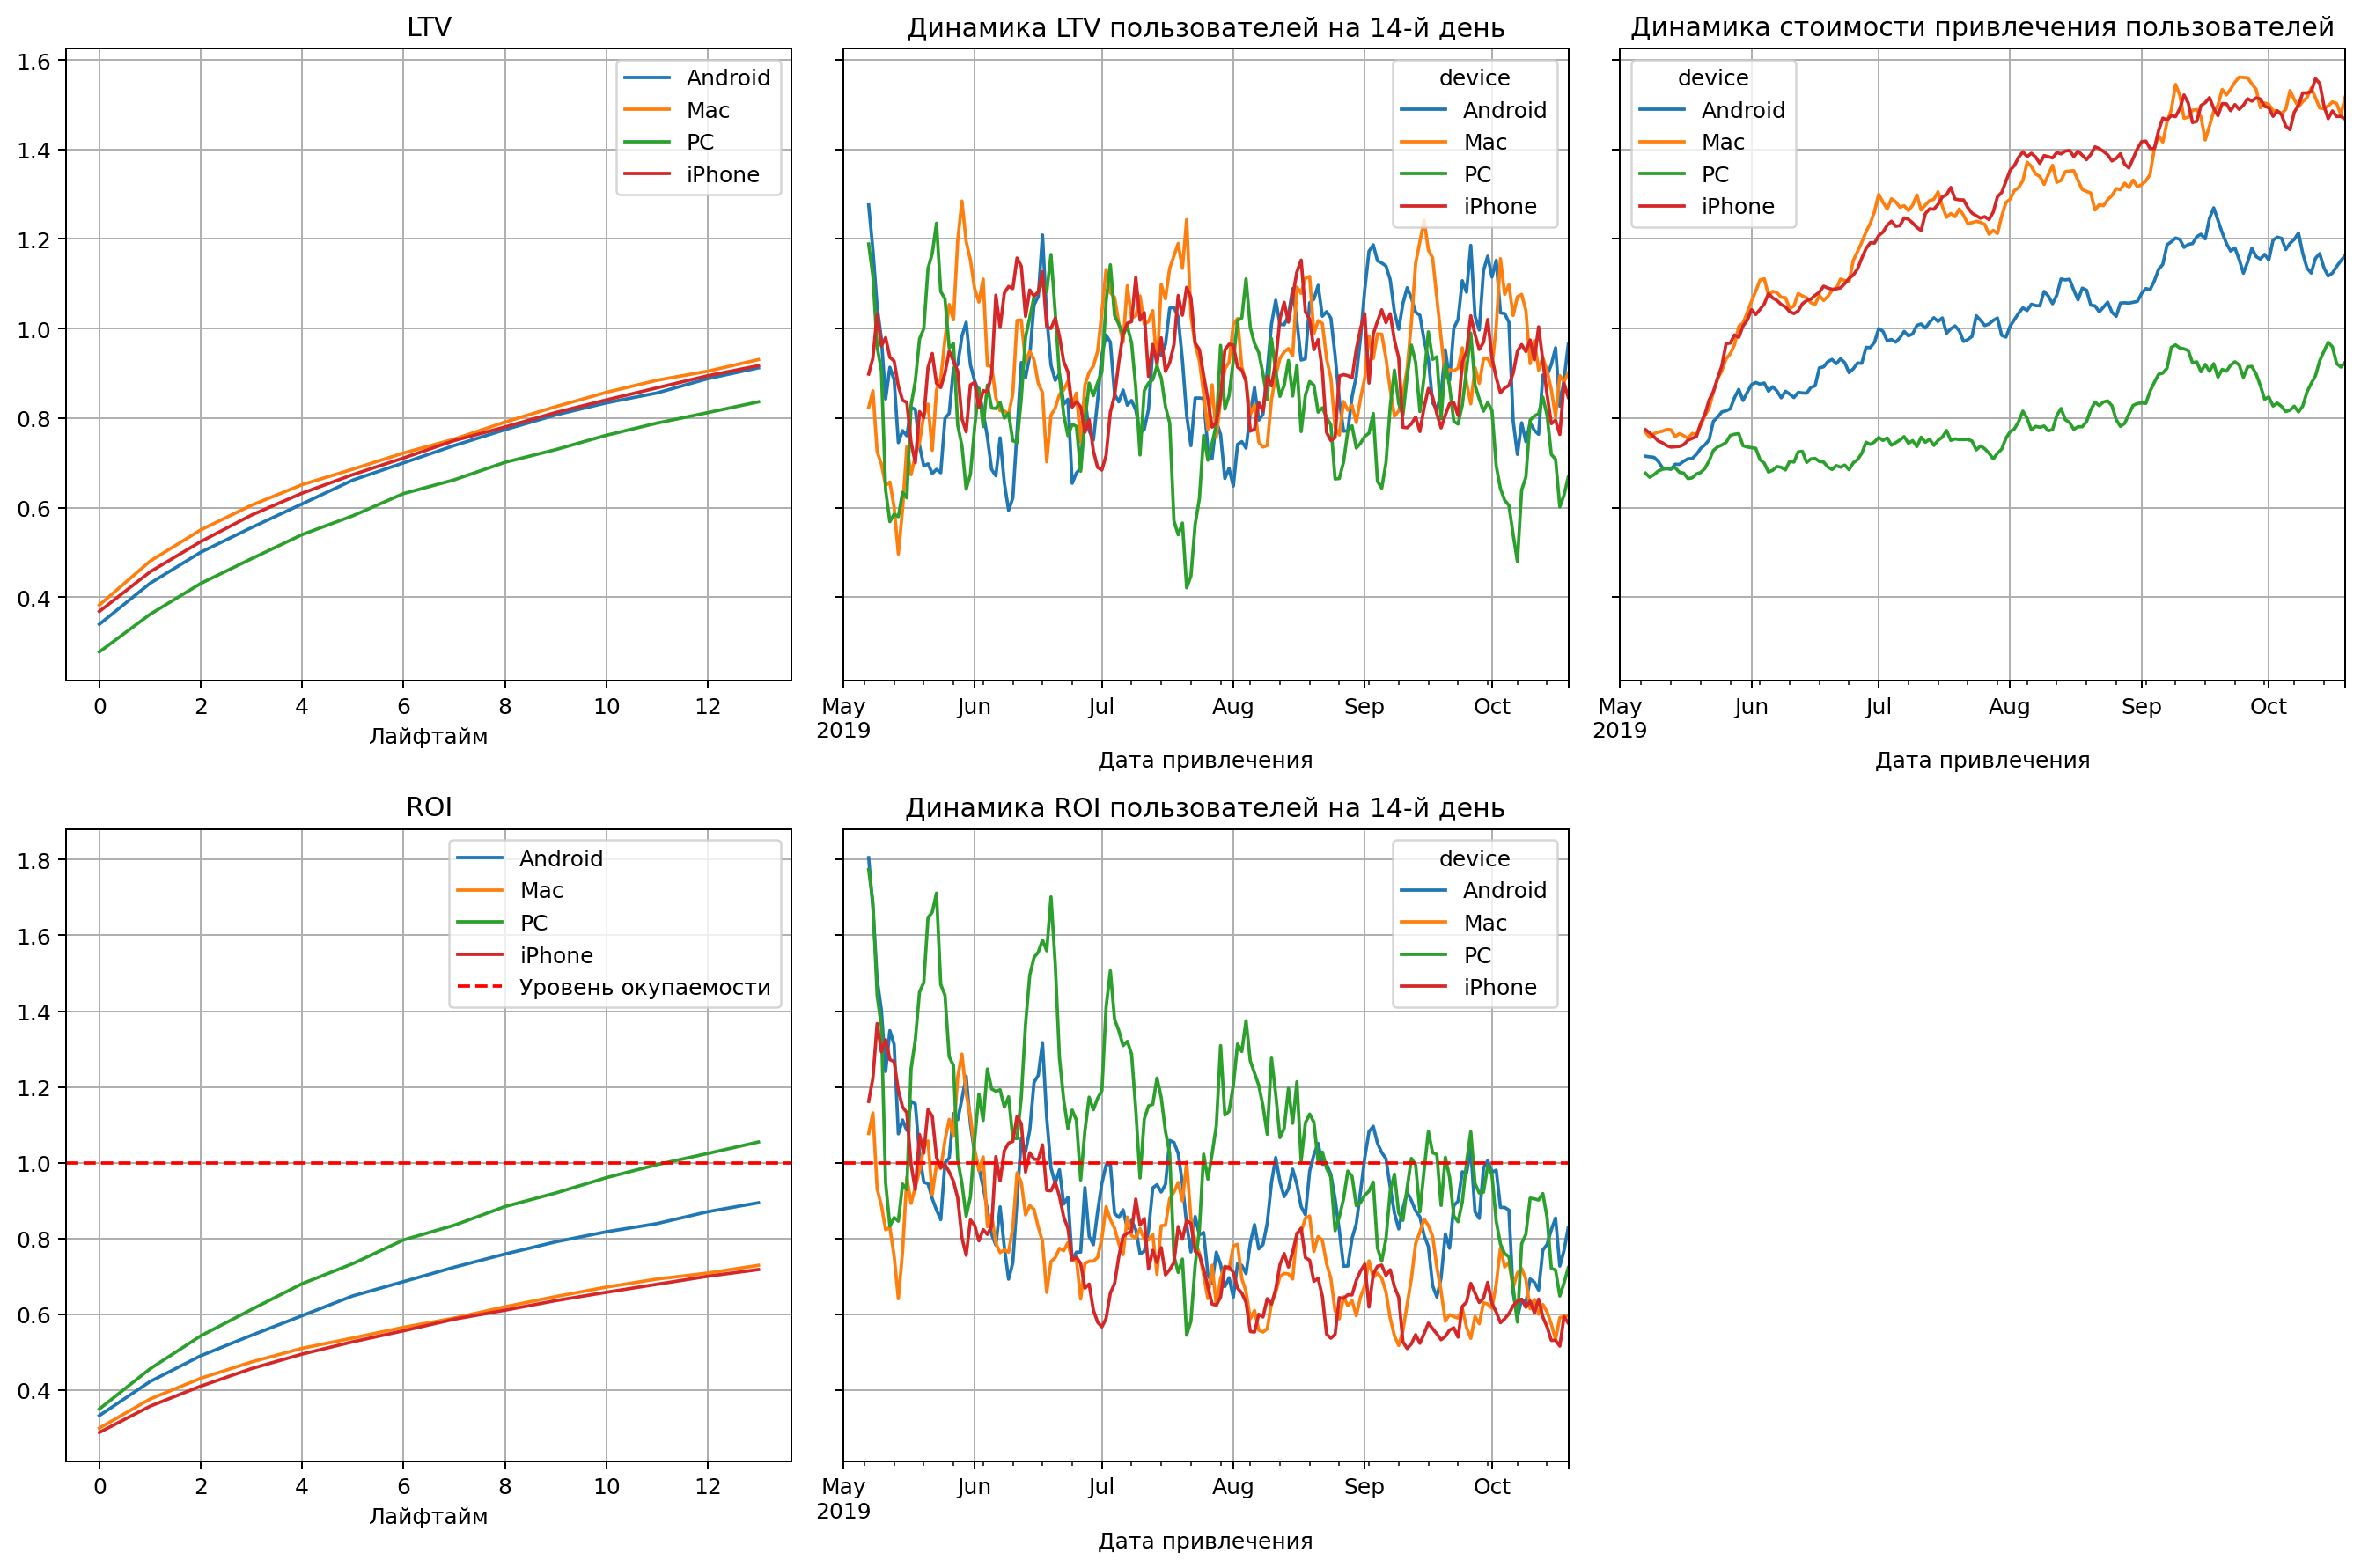

In [56]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_orgout, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon_days, 
                                                                      dimensions=['device']
                                                                     )
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

##### Наблюдения:
- LTV пользователей всех устройств на четырнадцатый день примерно одинаковая - 92 цента, немного отстают пользователи персональных компьютеров (PC), у них LTV(14) равен 83 цента;
- LTV остается примерно постоянной для всех устройств в течение рассматриваемого периода - колеблется в пределах 70-110 центов;
- средние ROI пользователей PC показывают окупаемость рекламы на 12-й день, а привлечение пользователей на Android, iPhone и Mac не окупается и на максимальный, 14-й день, показывая уровень 90% и 70% соответственно...;
- ...но, если проследить динамику ROI, видно, что к концу периода наблюдения и РС ныряют под красный пунктир, т.е. рекламные вложения перестают окупаться;
- САС все время растут и сильно отличаются для разных устройств: в конце периода наблюдения для устройств Apple (iPhone и Mac) средняя стоимость привлечения равна примерно 151 цент, для Android - 120, для PC - 95 центов.

#### Анализ окупаемости рекламы с разбивкой по странам; построение графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI

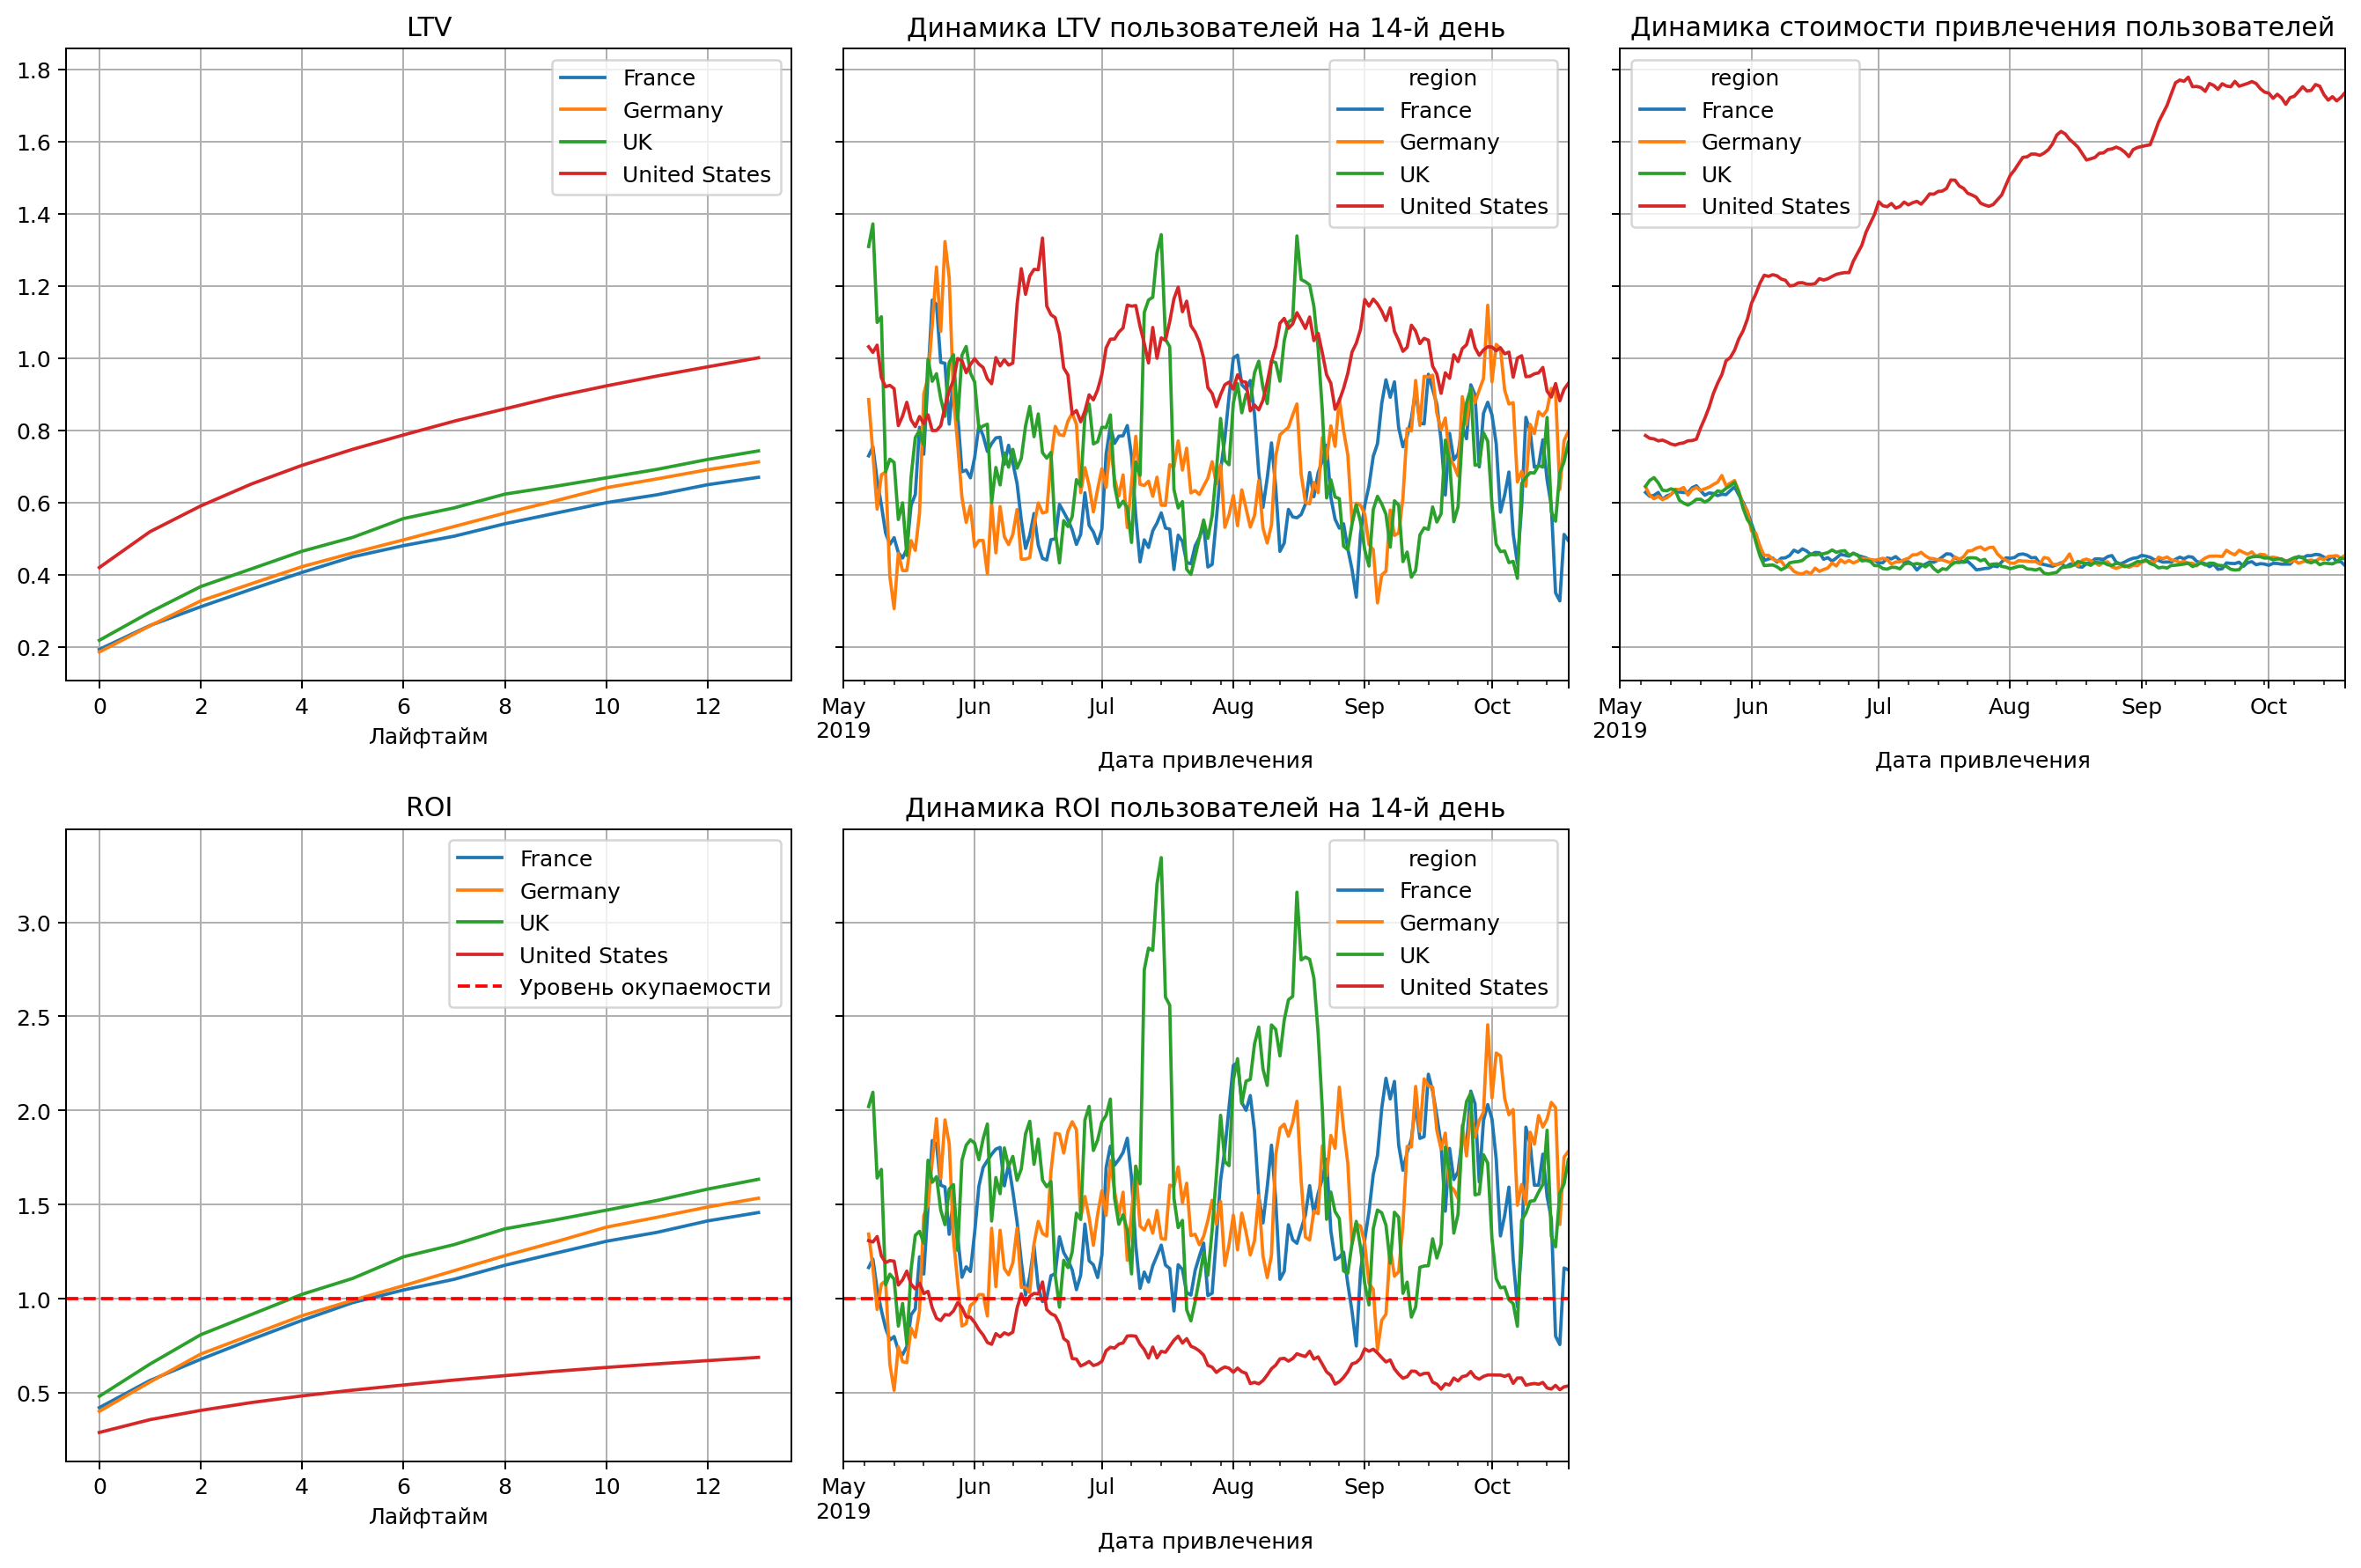

In [57]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_orgout, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon_days, 
                                                                      dimensions=['region']
                                                                     )
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Наблюдения:
- двухнедельный средний LTV США является самым большим, почти на 30 центов превышая остальные страны;
- плата за это - почти четырехкратное превышение американской САС всех прочих САС - 172 центов против 42;
- причем, это видно по графику динамики LTV, июньское увеличение САС именно для американских пользователей с 80 до 120 центов подарило компании только моментный приток пользователей, а далее, после сравнимого падения, график продолжил колебаться;
- июньские дополнительные вливания в рекламу снизили САС по всем странам в полтора раза, с 60 до 40 центов, но для США САС, наоборот, выросла в те же полтора раза;
- на графике средней ROI все страны показывают окупаемость рекламных вложений уже на 5-й, 6-й день привлечения; для США кривая, кажется, никогда не коснется красного пунктира, доходя к 14-му дню только до уровня 70%;
- это подтверждается графиком ROI в динамике: США перестало окупаться в конце июня, и дальше график медленно и с небольшими периодическими отскоками ползет вниз; все же остальные страны почти никогда не проваливались под уровень окупаемости.

#### Анализ окупаемости рекламы с разбивкой по каналам привлечения; построение графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI

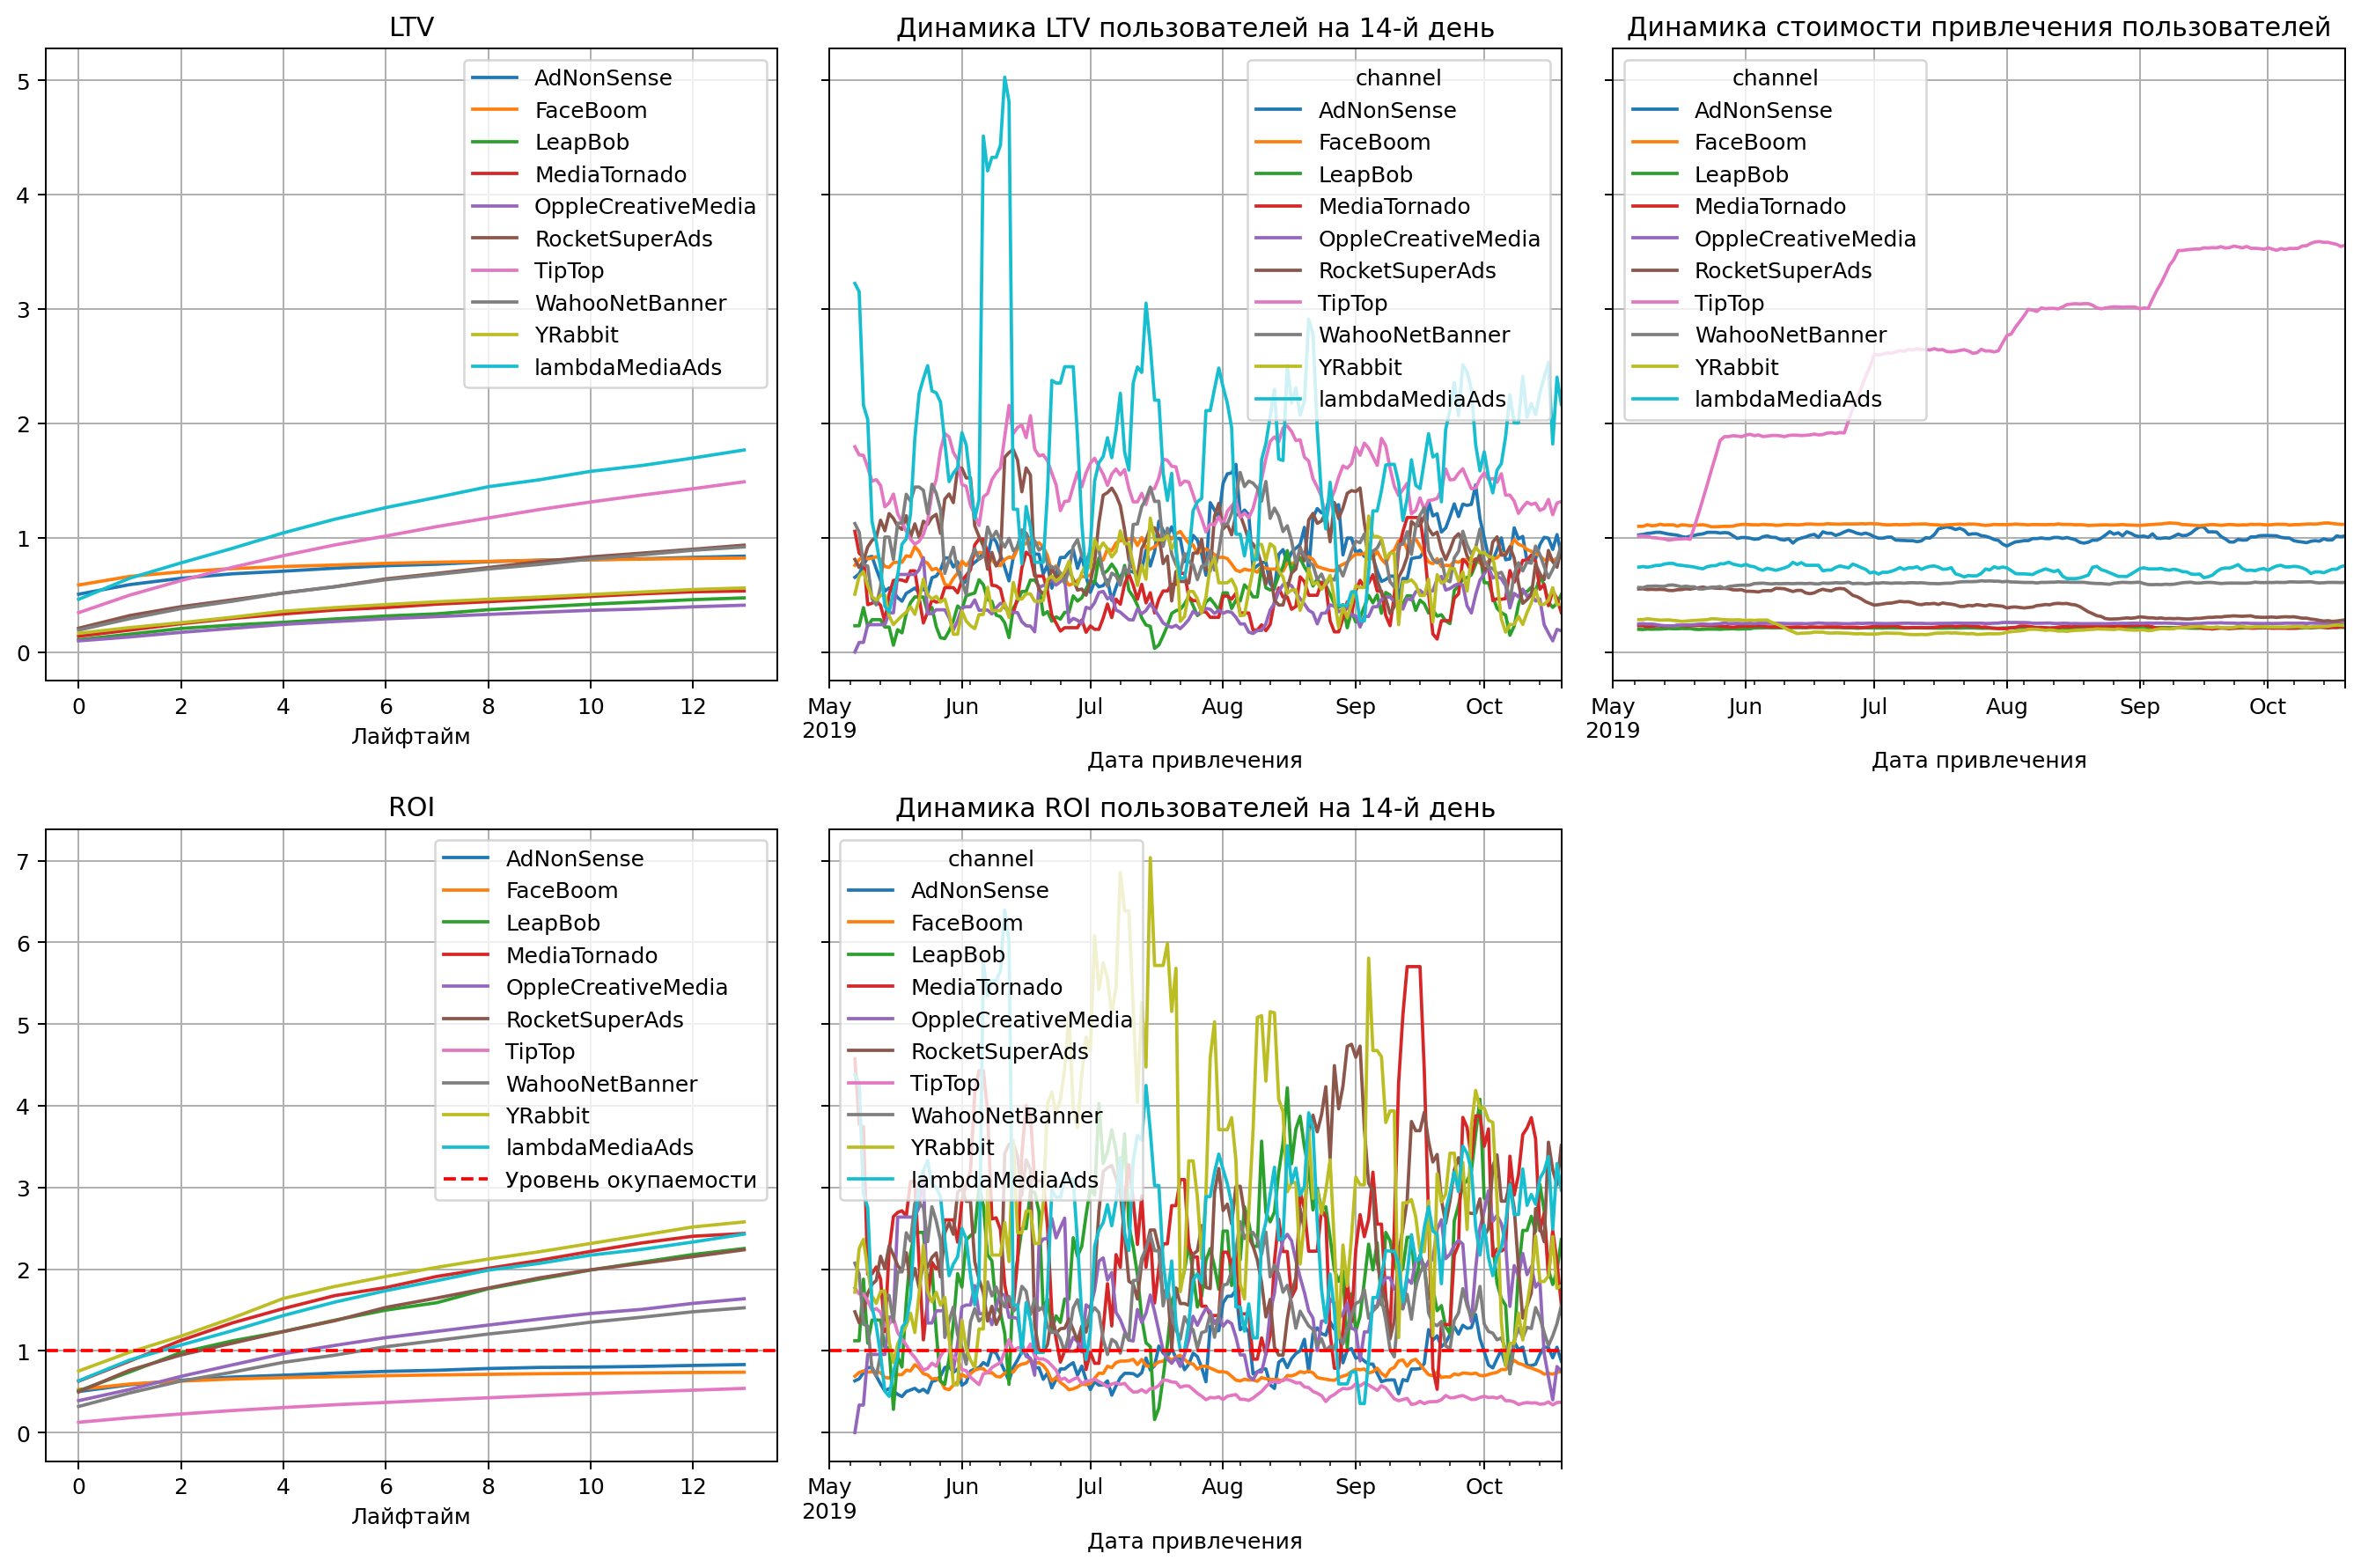

In [58]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_orgout, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon_days, 
                                                                      dimensions=['channel']
                                                                     )
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Наблюдения:
- среднее LTV максимально у lambdaMediaAds, немного отстает TipTop, 175 и 150 центов соответственно; остальные каналы к концу двух недель не превышают единицу;
- среднее ROI lambdaMediaAds так же среди каналов с самыми высокими графиками и окупаемостью на 2-й-3-й день; каналы же, приводящие максимальное количество клиентов, TipTop и FaceBoom, не поднимаются за две недели до единицы, т.е. не окупаются; также не окупается реклама на канале AdNonSense;
- САС TipTop имеет странную ступенчатую форму: примерно один раз в месяц она повышается на полдоллара, а в самом начале на целый доллар, и лишь в конце остается стабильной на уровне 3.5 доллара; при том, что для всех остальных каналов САС остается на одном уровне. 

#### Дополнительные расчеты и визуализация  
В процессе поиска возможных причин для проблем с окупаемостью рекламы и ответов на вопросы проектного задания, возникла необходимость провести дополнительные исследования. Их ход и результаты показаны в этом подразделе проекта.  

Изучим рекламу в США в разбиении по рекламным каналам:

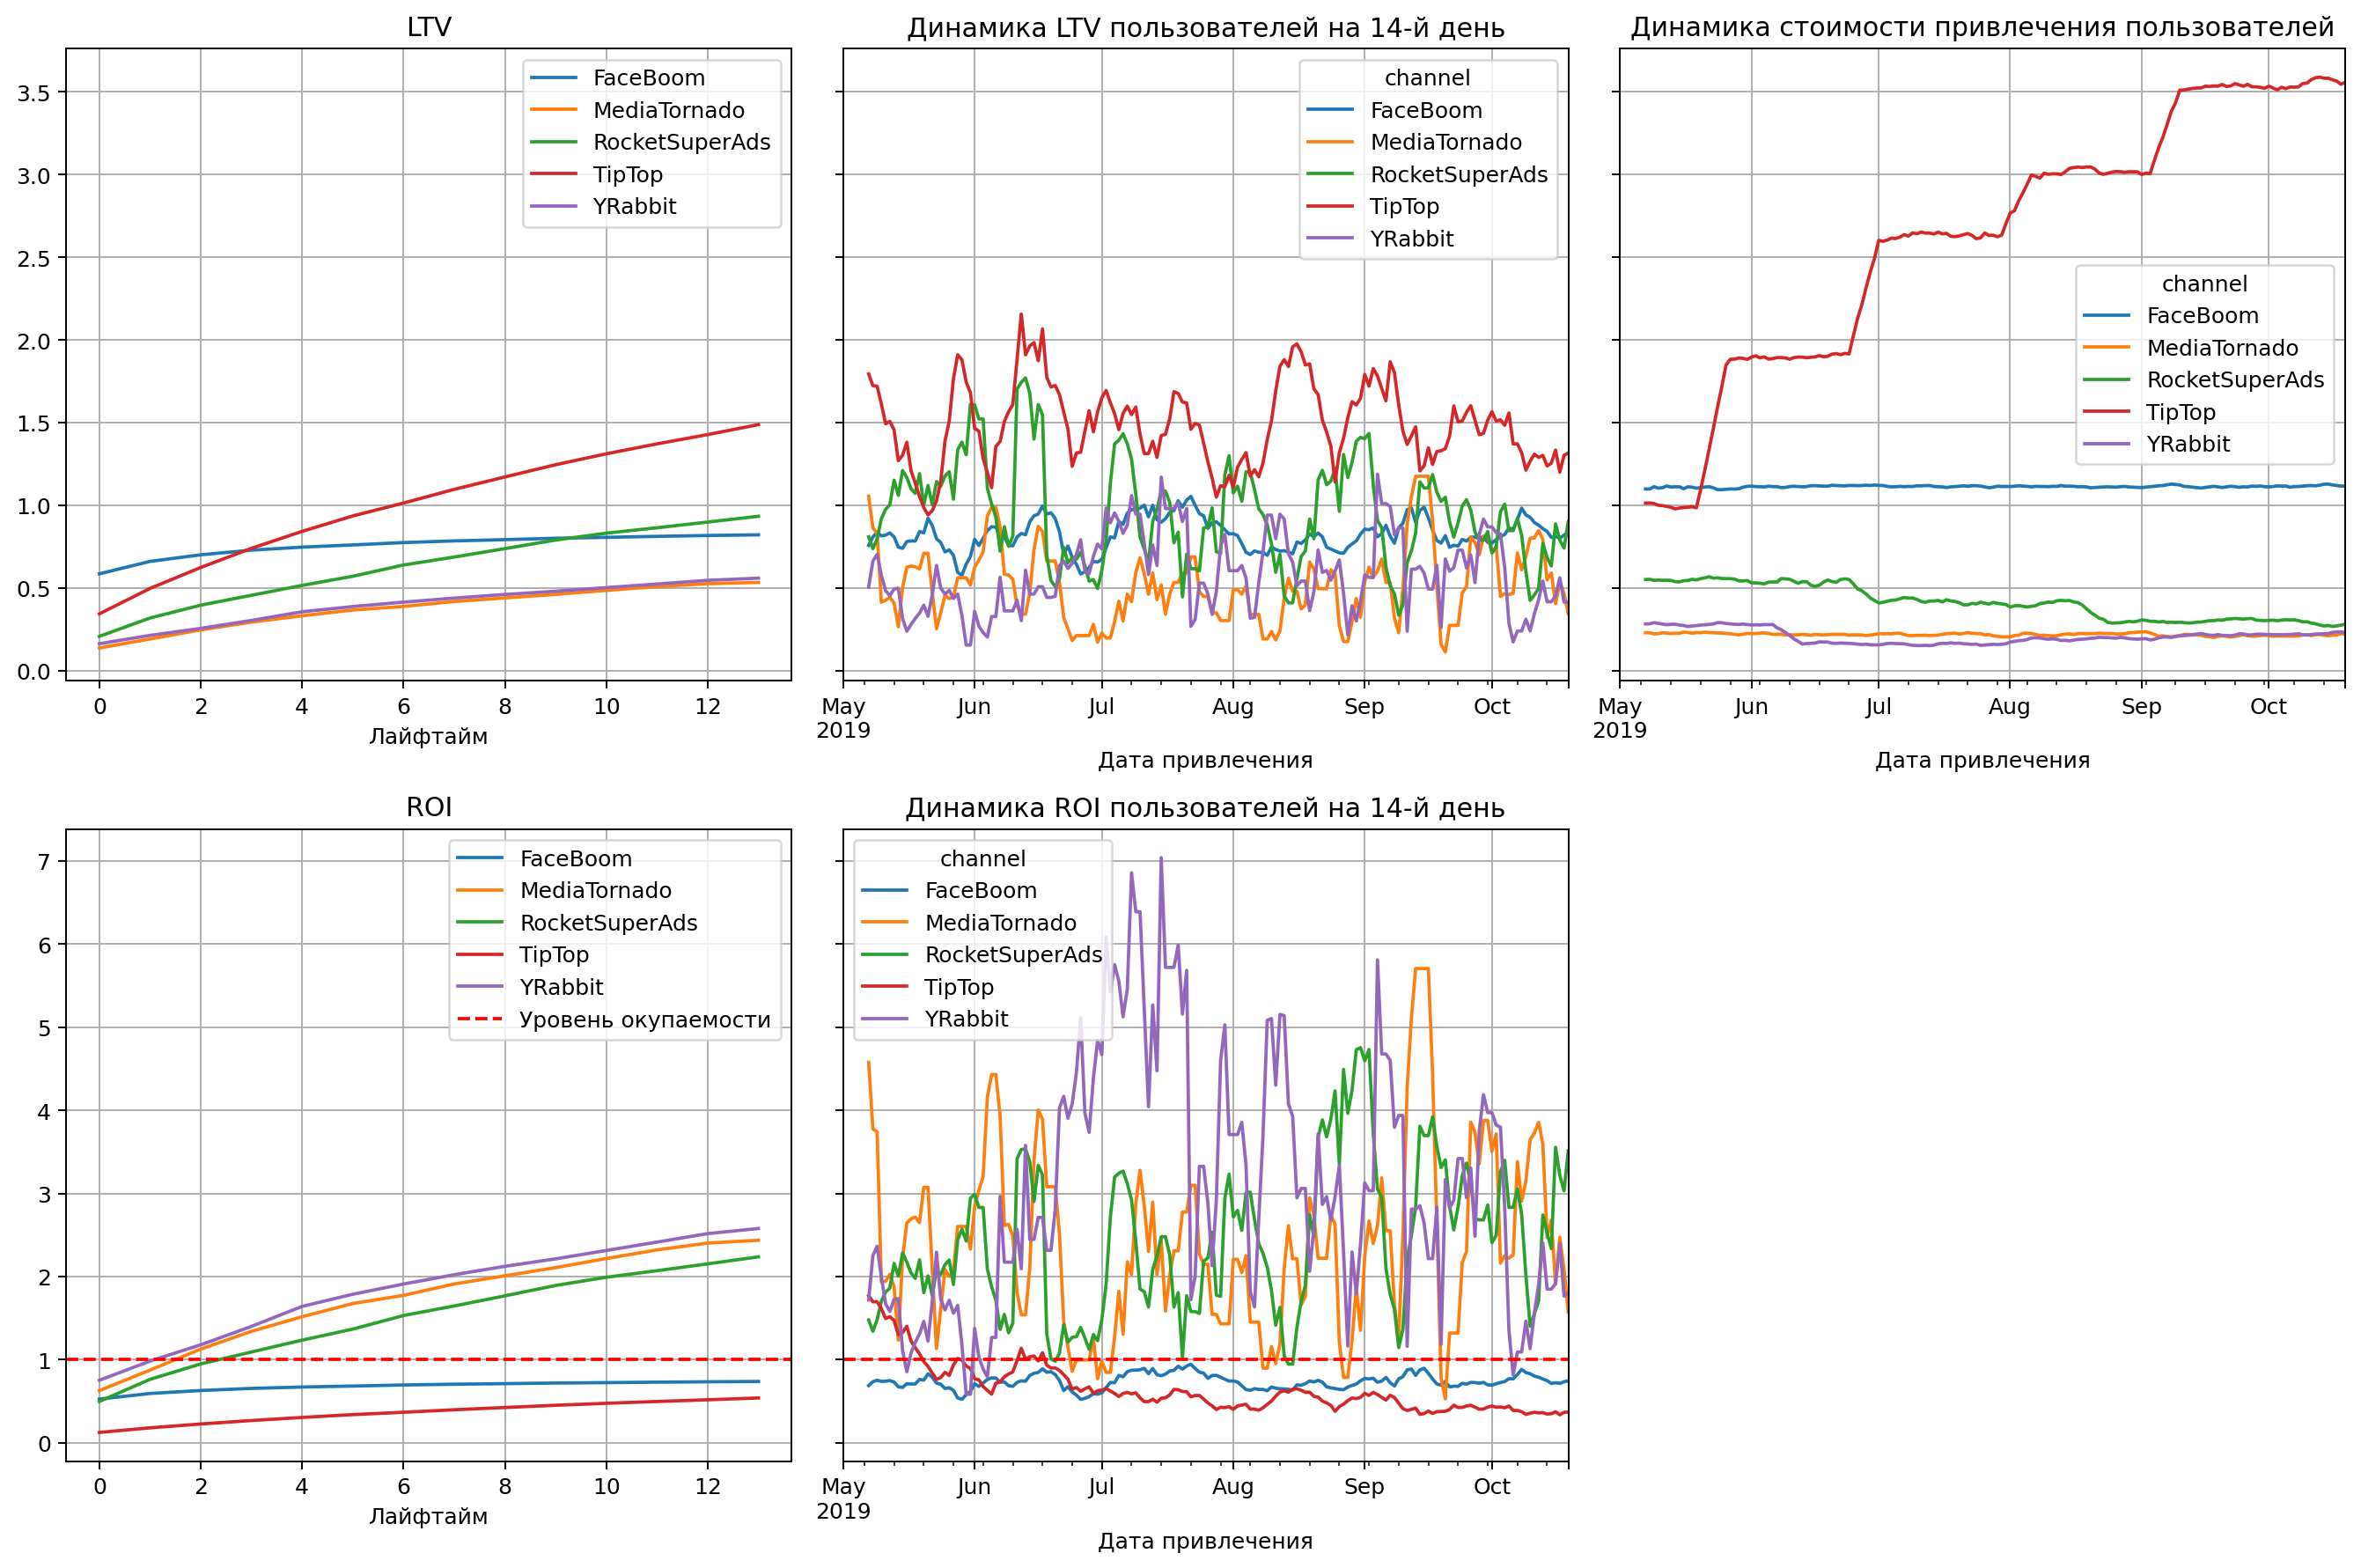

In [59]:
profiles_orgout_usa = profiles_orgout.query('region == "United States"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_orgout_usa, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon_days, 
                                                                      dimensions=['channel']
                                                                     )
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Наблюдения:  
- в США работают только 5 из 10 каналов привлечения;
- самый высокий LTV у TipTop - \\$1.5, самый низкий, \\$0.55, - у MediaTornado и YRabbit;
- лучшие показатели ROI, как раз, у MediaTornado и YRabbit - они окупаются на 2-3-й день, а TipTop и FaceBoom не окупаются совсем;
- CAC стабилен для каналов FaceBoom и MediaTornado (равны \\$1.1 и \\$0.24, соответственно); для RocketSuperAds он снижается в два раза (с \\$0.55 до \\$0.27); для YRabbit он снижается, а потом медленно вырастает до начальных значений (\\$0.55); и для TipTop ступенчато, в среднем раз в месяц, возрастает на полдоллара в начале месяца (с \\$1.00 до \\$3.5);
- заметим, что не окупающиеся каналы FaceBoom и TipTop работают только в регионе США и их окупаемость практически не зависит от типа устройства пользователя.  

Рассмотрим попристальнее рекламу в других странах в разбивке по рекламным каналам.

Великобритания:

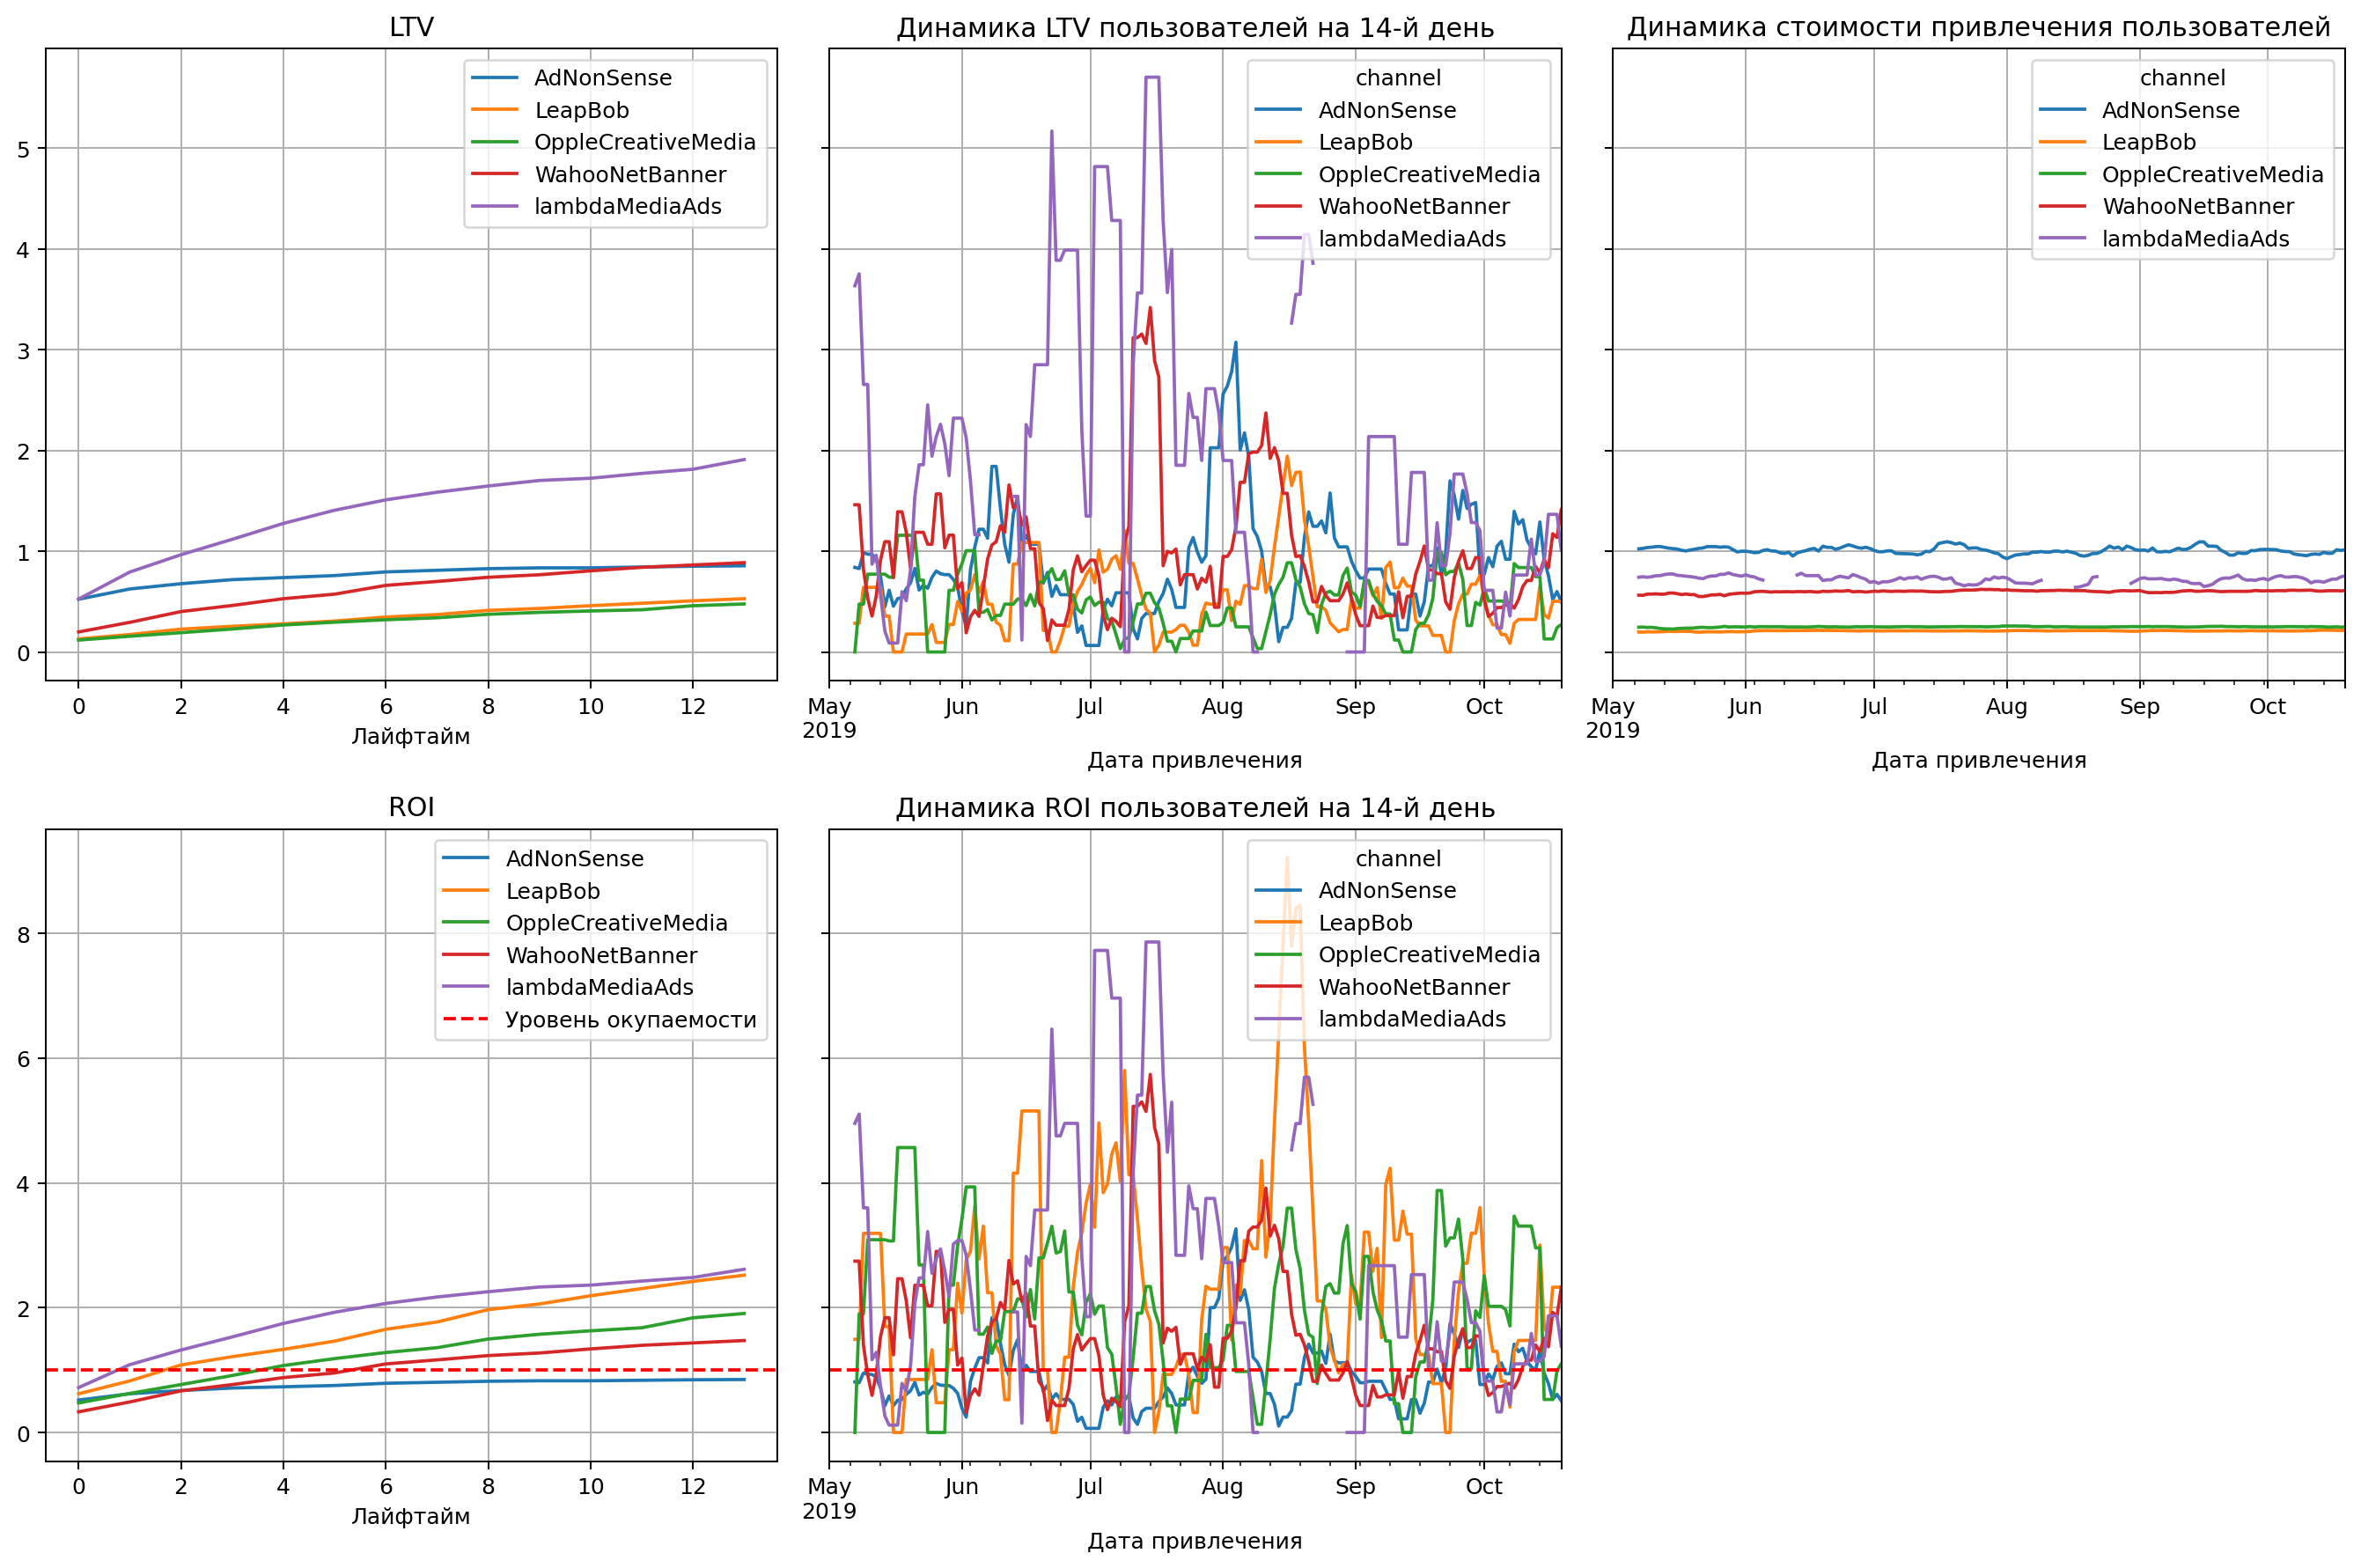

In [60]:
profiles_orgout_uk = profiles_orgout.query('region == "UK"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_orgout_uk, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon_days, 
                                                                      dimensions=['channel']
                                                                     )
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Франция:

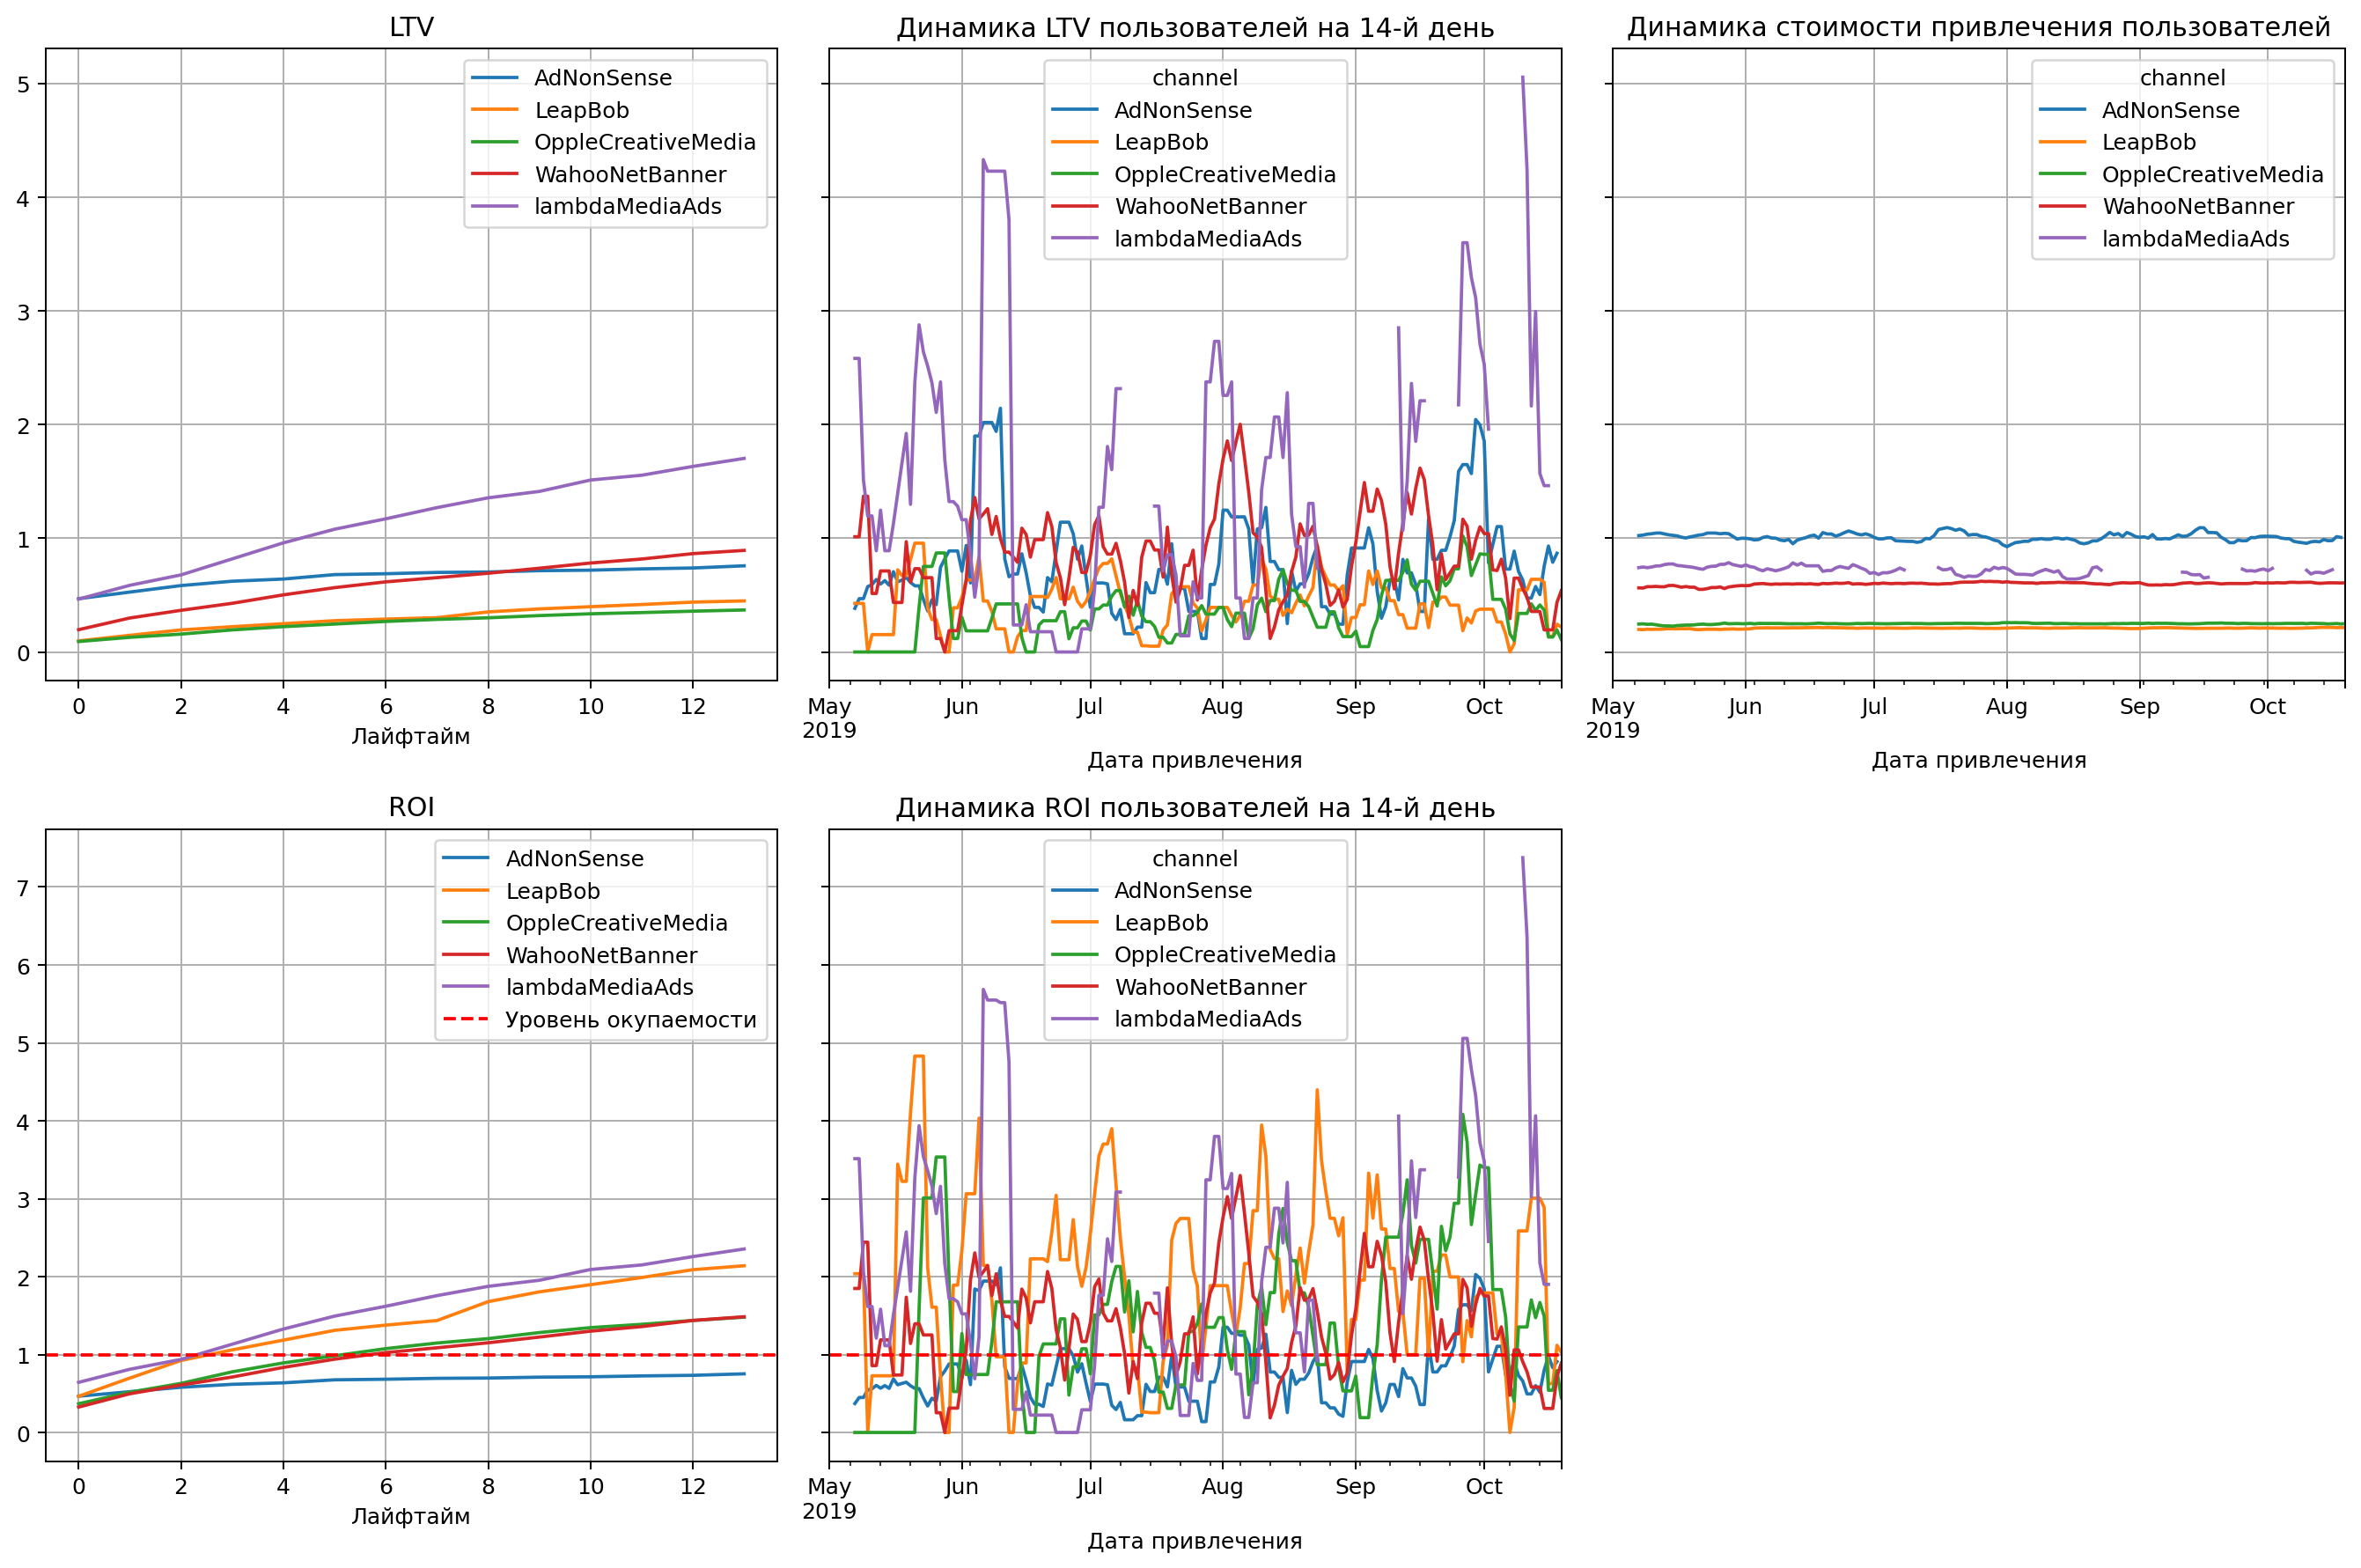

In [61]:
profiles_orgout_fra = profiles_orgout.query('region == "France"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_orgout_fra, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon_days, 
                                                                      dimensions=['channel']
                                                                     )
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Германия:

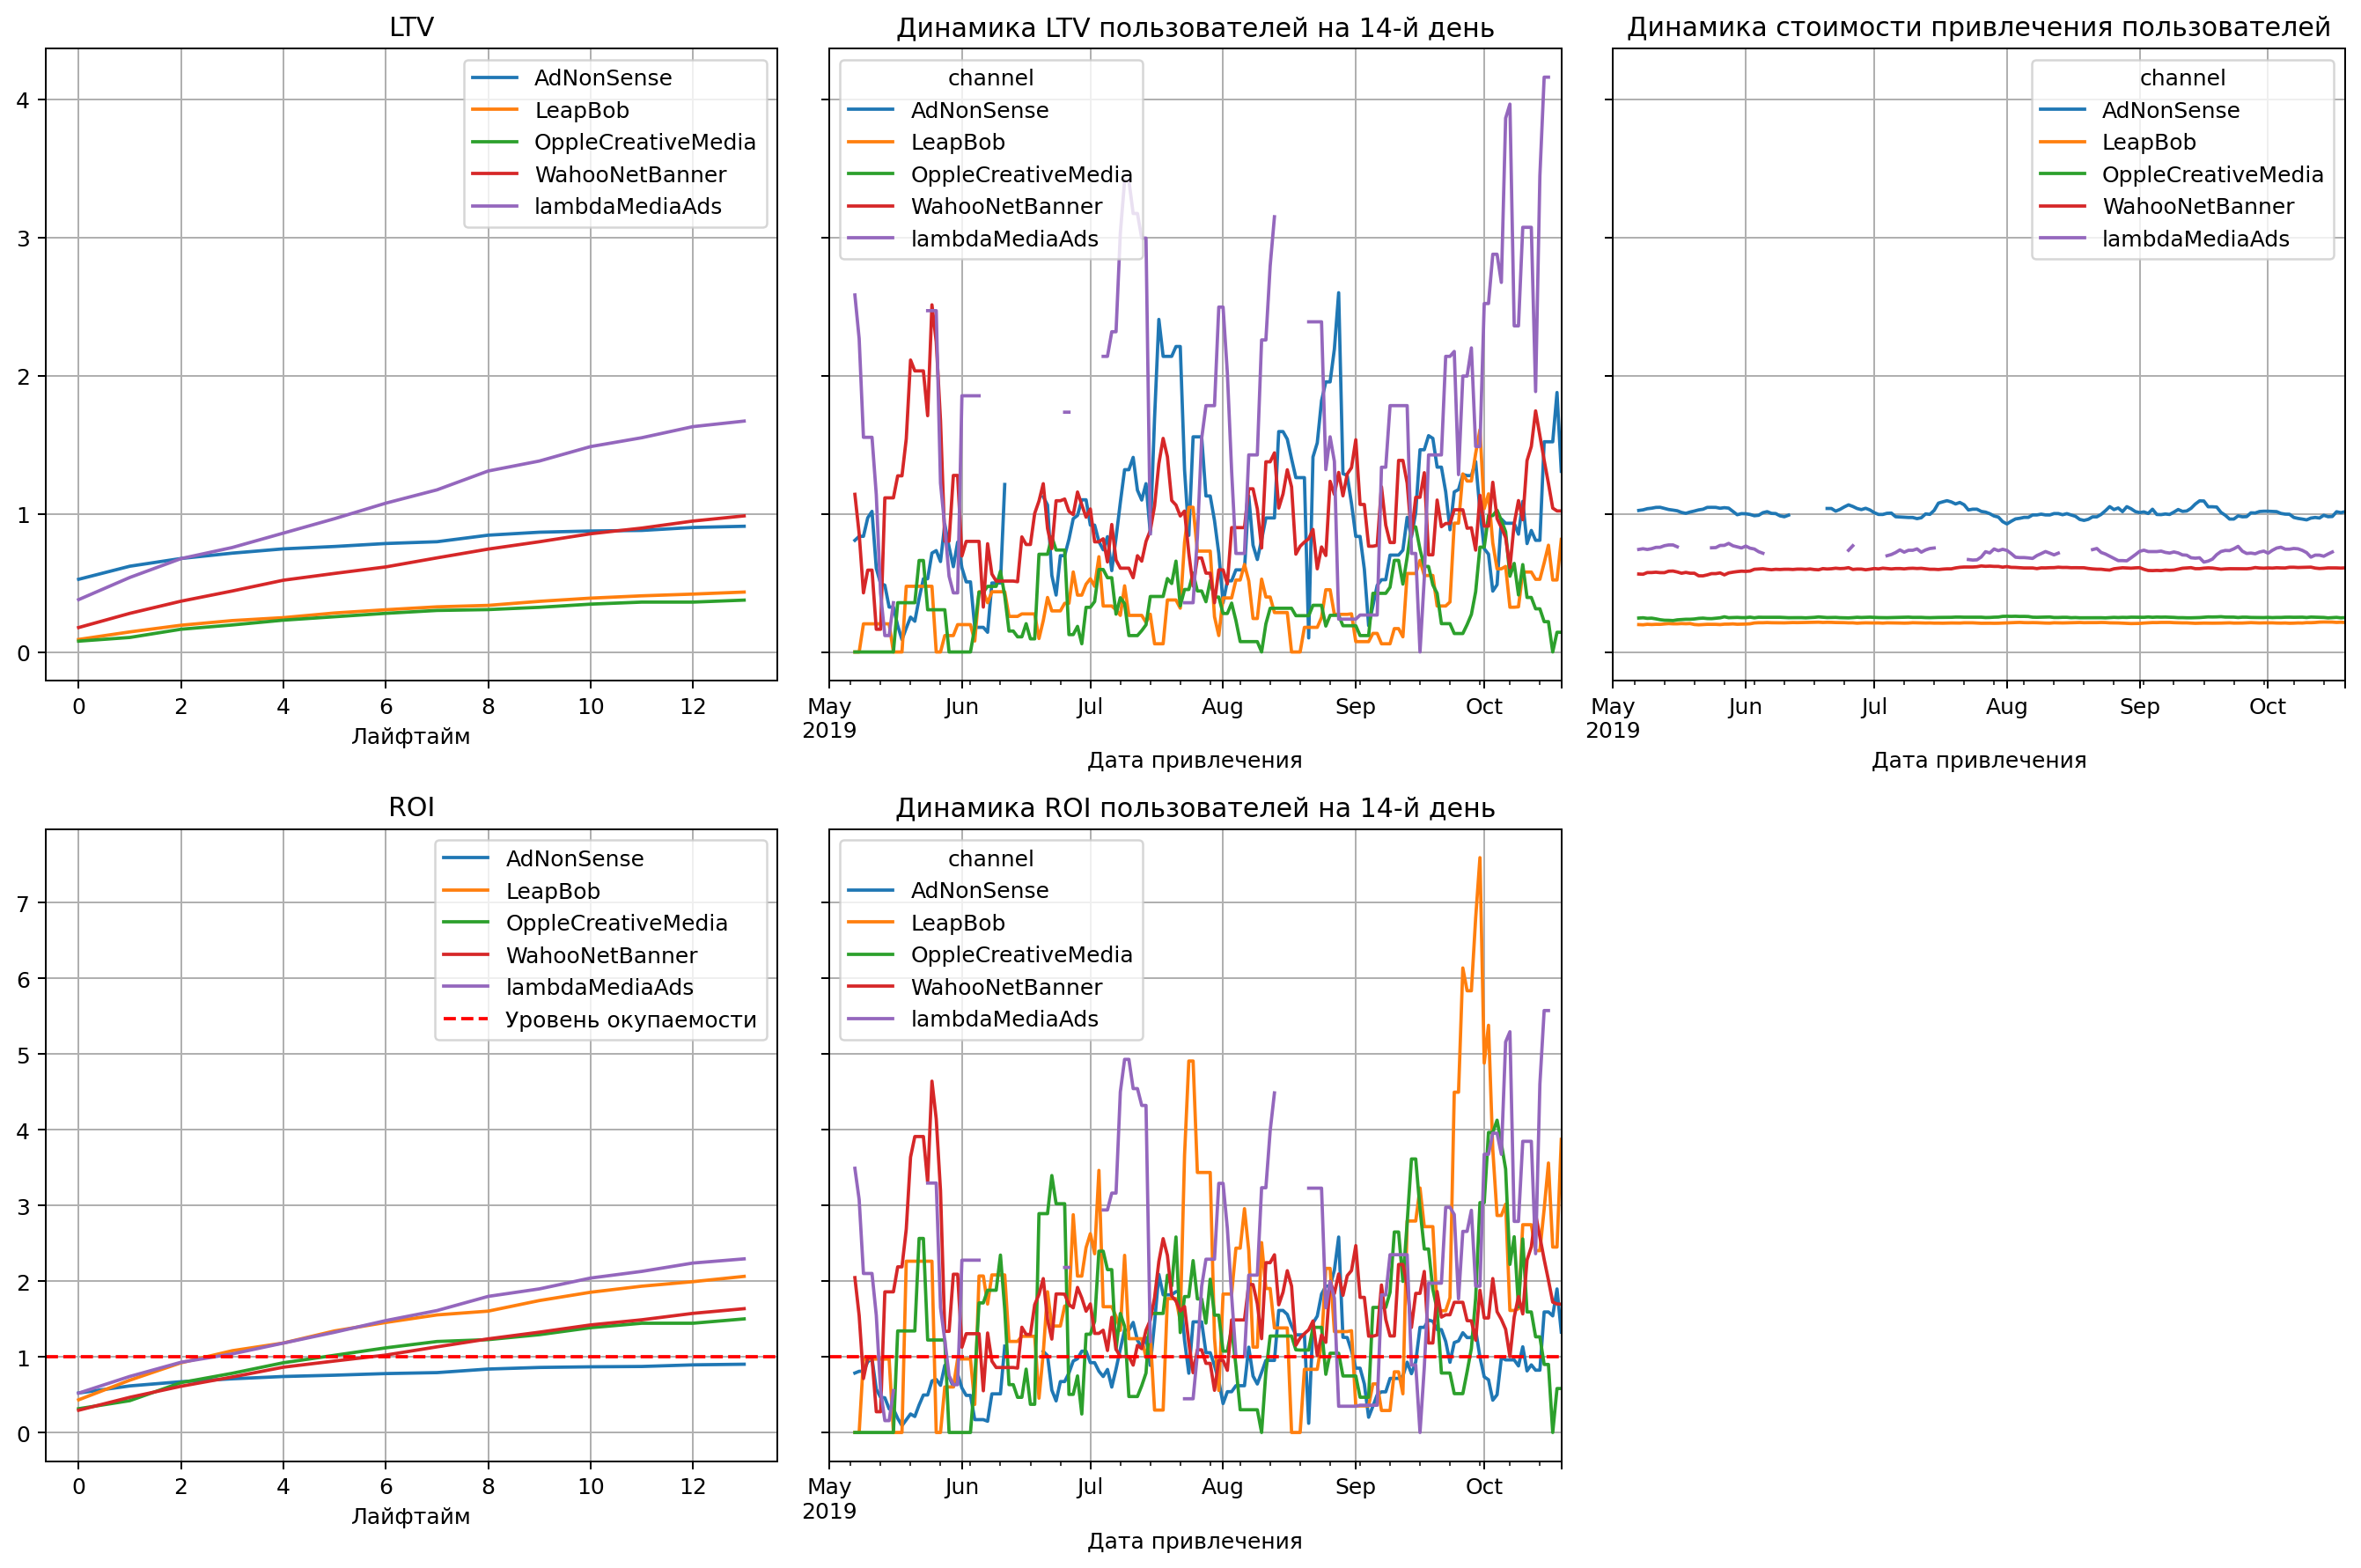

In [62]:
profiles_orgout_ger = profiles_orgout.query('region == "Germany"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(profiles_orgout_ger, 
                                                                      orders, 
                                                                      observation_date, 
                                                                      horizon_days, 
                                                                      dimensions=['channel']
                                                                     )
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Наблюдения:  
- рекламные каналы Европы и США не пересекаются;
- в Европе все графики практически похожи, лучшим рекламным каналом по прибыльности является lambdaMediaAds, а аутсайдером - AdNonSense, как бы оправдывающий свое название, - за две недели окупаются все каналы, кроме него.

Далее, рассмотрим конверсию и удержание в разбивке по странам, устройствам и рекламным каналам.

Разбивка по странам:

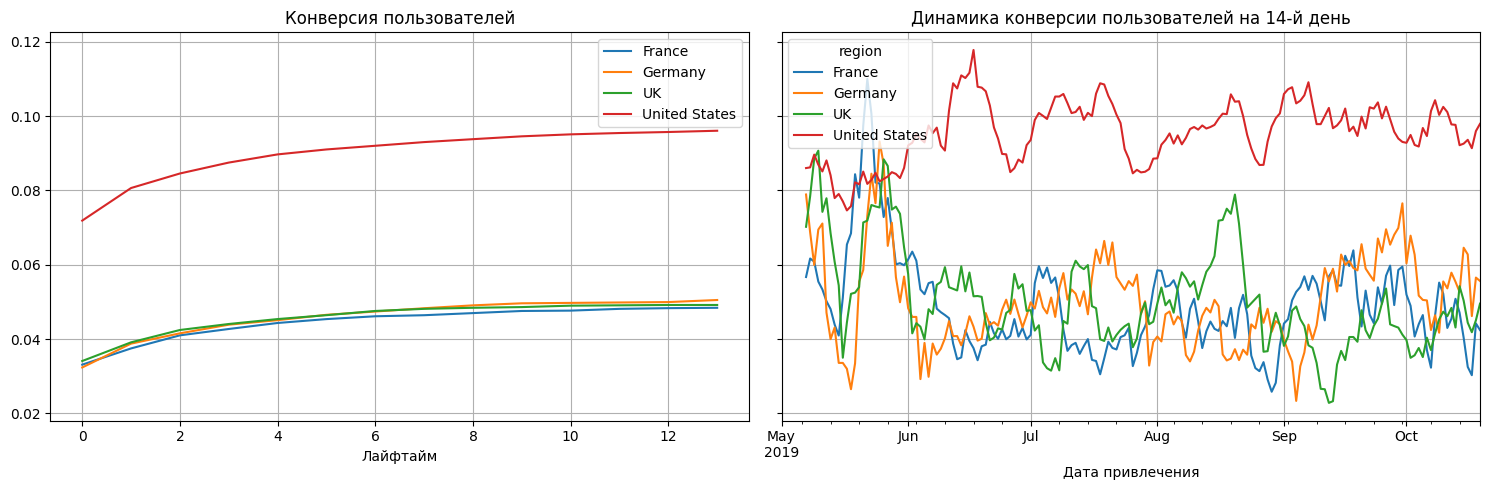

In [63]:
# конверсия по странам, ее изменение и их графики:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_orgout, orders, observation_date, horizon_days, dimensions=['region']
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

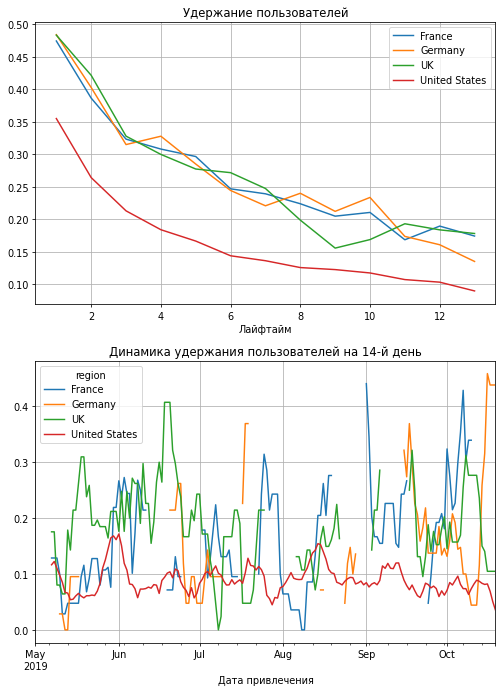

In [64]:
# удержание по странам, его изменение и их графики:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_orgout, visits, observation_date, horizon_days, dimensions=['region']
)
plot_retention(retention_grouped, retention_history, horizon_days)

Наблюдения:  
- конверсия в США в два раза больше других стран - 10% к 5%;
- а удержание в 2 раза меньше - 9% к 18%;
- более плавные графики конверсии и удержания США говорят лишь о том, что в США больше пользователей, и средний результат меньше подвержен колебаниям.

Разбивка по устройствам:

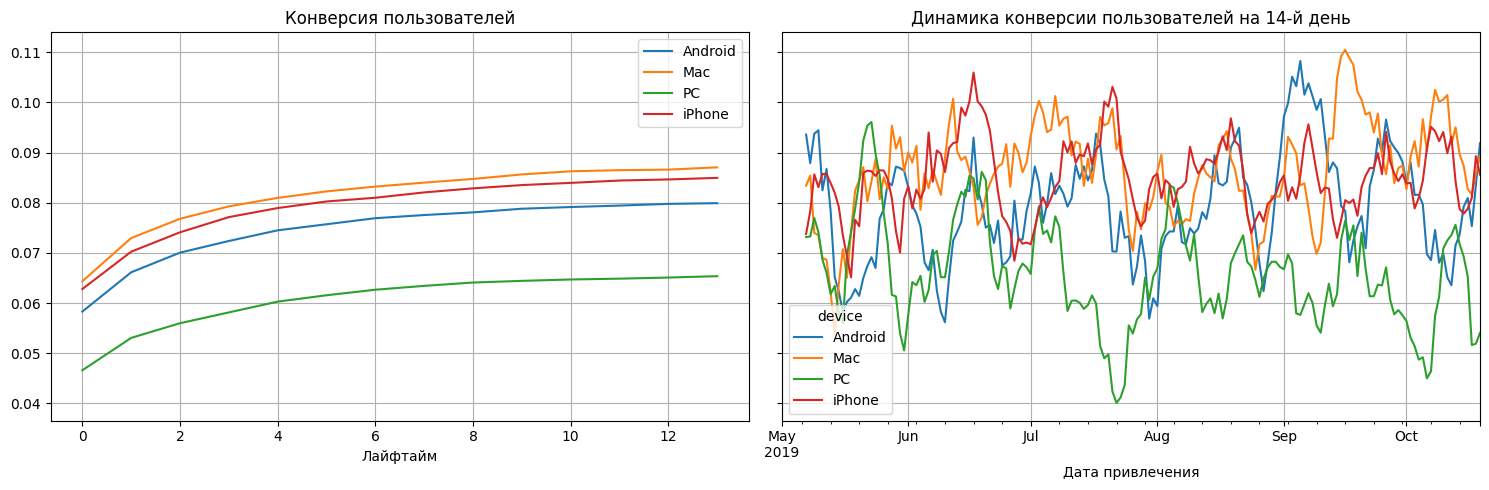

In [65]:
# конверсия по устройствам, ее изменение и их графики:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_orgout, orders, observation_date, horizon_days, dimensions=['device']
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

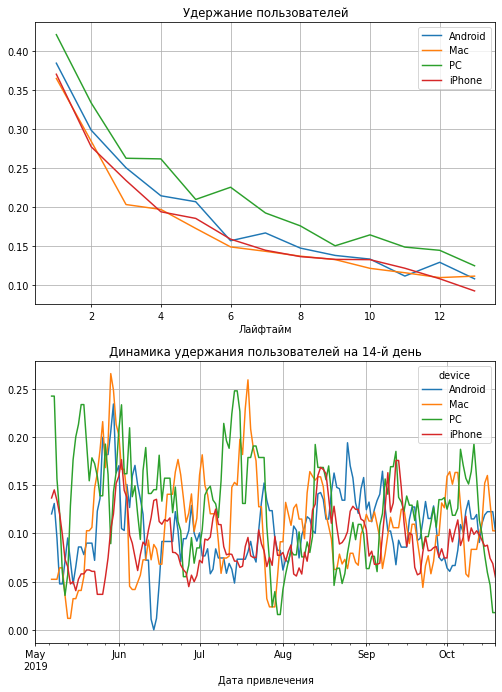

In [66]:
# удержание по устройствам, его изменение и их графики:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_orgout, visits, observation_date, horizon_days, dimensions=['device']
)
plot_retention(retention_grouped, retention_history, horizon_days)

Наблюдения:  
- конверсия максимальна у iPhone и Mac (8.5% и 8.7%), немного отстает Android (8%) и ниже всех находится конверсия пользователей РС (6.5%);
- зато удержание лучше у РС - 13%, а ниже всех пользователи iPhone - 9%.

Разбивка по каналам привлечения:

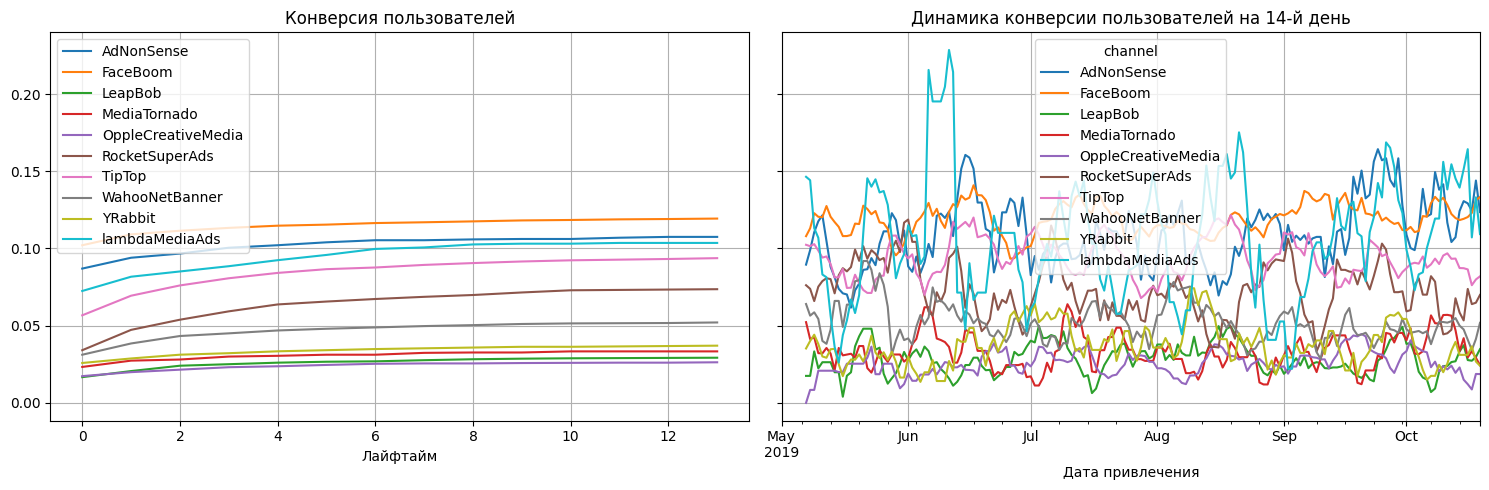

In [67]:
# конверсия по каналам привлечения, ее изменение и их графики:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles_orgout, orders, observation_date, horizon_days, dimensions=['channel']
)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

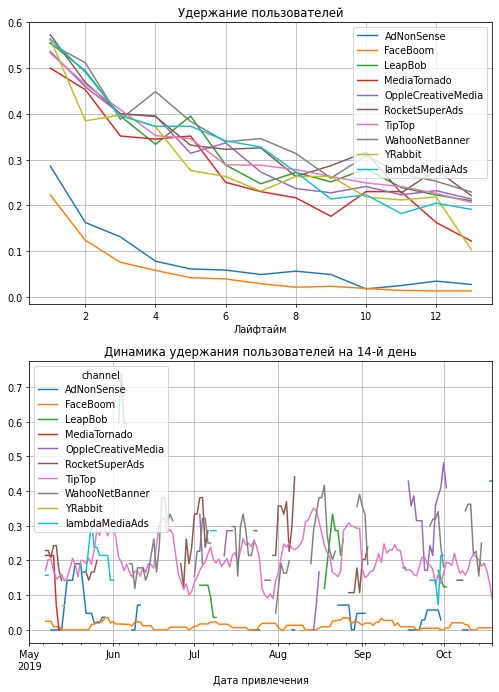

In [68]:
# удержание по каналам привлечения, его изменение и их графики:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles_orgout, visits, observation_date, horizon_days, dimensions=['channel']
)
plot_retention(retention_grouped, retention_history, horizon_days)

Наблюдения:  
- LTV для всех каналов выходит на горизонталь уже практически на 9-й день;
- лучше все конверсия у FaceBoom и AdNonSense - 12% и 11% соответственно, но с удержанием у них катастрофа - 2% и 3% в конце второй недели, при том, что у прочих каналов удержание от 10% до 24%; 
- лучшие по удержанию - RocketSuperAds и WahooNetBanner, с относительно средней конверсией - 7.4% и 5.4%.

#### Выводы (ответы на вопросы):  

1) **Окупается ли реклама, направленная на привлечение пользователей в целом?**  
   На момент 1-го ноября 2019, согласно графикам пункта 0.5.1 данного проекта общий средний ROI (возврат инвестиций) не достигает единицы за установленный приемлемый срок две недели. Т.е. реклама **не** окупается.  
   При этом, если существующие тенденции в динамике ROI сохранятся, точка окупаемости будет сдвигаться еще дальше вправо.  

   
2) **Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?**  
   - ***Устройства:***  
     **iPhone** и **Mac** имеют самую большую САС и ROI ниже 1, а, учитывая, что их пользователи это почти 85% от всех, то их роль в формировании общей окупаемости отрицательная; пользователи устройств с **Android** тоже не окупаются, но у них ROI чуть повыше.
   - ***Страны:***  
     **США** очевидно выбивается из общего визуального ряда своей гигантской САС, четырехкратно превышающей любой другой регион, и, как следствие, ROI ниже порога окупаемости; при этом платящие пользователи из США составляют 78% от всех, поэтому не удивительно, что и общая ROI не доходит до единицы.
   - ***Рекламные каналы:***  
      Наибольшие по привлеченным пользователям каналы **TipTop** и **FaceBoom** не окупаются - ROI не достигает единицы за две недели; это отрицательно влияет на общую окупаемость.  
     В Европе также есть проблемный, неокупающийся канал **AdNonSense**, но пользователей оттуда относительно немного, поэтому его влияние не так заметно - общий ROI для Европы показывает окупаемость на 6-й день.

     
3) **Чем могут быть вызваны проблемы окупаемости?**     
   Начнем с самой большой проблемы - пользователи США. Конверсия больше, чем у других стран в 1.65 раза, но удержание платящих пользователей в 2 раза меньше, чем по другим странам (см. Приложение ниже). Т.е. они совершают первую покупку, но потом теряют интерес и больше не платят. Это может быть связано с несоответствием рекламы продукту, неверной целевой аудиторией, неудобством пользования продуктом именно для американцев, таким, например, как метрическая система или еще что-нибудь, связанное с местными особенностями, особенностями функционирования продукта именно в североамериканском регионе.  
   
   Вторая большая проблема - реклама на TipTop и FaceBoom.  
   Как видно из графиков в Приложении ниже, конверсия у них около десяти процентов, выше других каналов. Но удержание пользователей FaceBoom ниже уровня даже органических пользователей, около 0.01! Т.е. пользователь благодаря рекламе совершает первую покупку, но на этом все и останавливается.  
   Удержание TipTop находится на уровне остальных каналов привлечения, но издержки на их рекламу и рекламу в TipTop несопоставимы - в десять раз меньше. Здесь реклама, видимо, соответствует получаемому продукту (удержание), но сравнимый с другими каналами результат достигается существенными финансовыми вливаниями, а, значит, скорее всего целевая аудитория выбрана неверно, и пользователи просто не обращают внимание на рекламу продукта.  
   
   Третья проблема - неокупающиеся пользователи устройств Apple, iPhone и Mac. Графики конверсии и удержания не показывают существенных отличий от пользователей других устройств, поэтому мы предполагаем, что плохие результаты окупаемости рекламы для пользователей Apple - это влияние корреляции с США, где эти устройства, предположительно, популярнее, чем в Европе.

**Промежуточные рекомендации рекламному отделу:**  
- выяснить, какие неудобства пользования продуктом испытывают пользователи в США;
- связано ли это с функционалом продукта или соответствием продукта рекламной информации;
- провести исследование отчетов о технических сбоях продукта;
- выяснить, удобно ли пользоваться продуктом на устройствах Apple;
- проверить, как выглядит реклама на каналах FaceBoom и TipTop в США на устройствах Apple;
- соответствует ли она целевой аудитории;
- рассмотреть возможность альтернативы TipTop и FaceBoom, например, RocketSuperAds, чей САС постепенно снижается при одинаковом уровне финансирования.

<a id='summary'></a>
### Выводы по проекту:  
[к оглавлению](#start)

В данном проекте проводился анализ окупаемости рекламных вложений для развлекательного приложения Procrastinate Pro+. Для работы были предоставлены данные о пользователях приложения, их посещений и покупок, а также данные о расходах на рекламу в десяти различных рекламных каналах.  

**Цель анализа**:  
- определить, окупаются ли средства, вложенные в рекламу приложения;
- если есть проблемы с окупаемостью, выявить их причины;
- написать рекомендации рекламному отделу компании по устранению факторов, снижающих окупаемость.

На этапе предобработки были проведены корректировка названий полей датасетов, оптимизация типов данных и проверка на наличие пустых значений и дубликатов.  

На этапе исследования данных была составлена таблица профилей пользователей, объединяющая данные о посещениях и о покупках пользователей, добавлены вспомогательные столбцы для составления сводных таблиц.  
Период наблюдения составил: с 1 мая 2019 года по 27 октября 2019. Уникальных пользователей - 150008 человек.
Посчитаны процентные доли пользователей в разбивке по странам, устройствам и рекламным каналам. Получен портрет типичного пользователя: это пользователь из США, зашедший в приложение через рекламу в FaceBoom со своего iPhone.  

В разделе исследования маркетинга была вычислена общая сумма расходов на рекламу за рассматриваемый период - \\$ 105497.3, и распределение этой суммы по рекламным каналам. Также были построены графики изменения расходов на рекламу по неделям и месяцам, и вычислена средняя CAC (стоимость привлечения одного пользователя) в разбивке по каналам.  

На этапе оценки окупаемости были проведены:  
- анализ общей средней окупаемости за рассматриваемый период с учетом органических пользователей и без;
- анализ общих конверсии и удержания;
- анализ средней за рассматриваемый период окупаемости в разбивке по странам, устройствам и рекламным каналам.

**Результатом** анализа окупаемости стали следующие выводы:  
- реклама за весь рассматриваемый период с 01.05.2019 по 27.10.2019 на момент 1 ноября не окупается за установленный приемлемый двухнедельный срок;
- тренд на снижение общей окупаемости появился в начале июня и продолжается с небольшими периодическими отскоками вверх;
- выяснилось, что основной причиной падения окупаемости является низкое удержание пользователей из США (10% - в два раза меньше, чем у остальных стран), которые составляют большинство - 78% от всех платящих пользователей;
- другой причиной является аномально низкое удержание (около 1-2%, в 20 раз ниже, чем у остальных) пользователей по рекламным каналам FaceBoom и AdNonSense, а также средние показатели канала TipTop при финансировании его на уровне, превышающем другие каналы в 10 раз.  

**Рекомендации** по устранению причин снижения окупаемости:
- выяснить, какие неудобства пользования продуктом испытывают пользователи в США;
- связано ли это с функционалом продукта или соответствием продукта рекламной информации;
- провести исследование отчетов о технических сбоях продукта;
- выяснить, насколько удобно пользоваться продуктом на устройствах Apple и мобильных устройствах с ОС Android;
- проверить, как выглядит реклама на каналах FaceBoom и TipTop в США и на канале AdNonSense в Европе;
- соответствует ли она целевой аудитории;
- рассмотреть возможность альтернативы проблемным рекламным каналам, например, хорошие показатели окупаемости имеют каналы: RocketSuperAds, YRabbit и MediaTornado - в США; и lambdaMediaAds, LeapBob, OppleCreativeMedia и WahooBanner - в Европе.